We use the MSDL atlas of functional regions in movie-watching. Fetch movie watching based brain development dataset (fMRI).  The data is downsampled to 4mm resolution for convenience with a repetition time (TR) of 2 secs. The origin of the data is coming from OpenNeuro.

In [1]:
from nilearn import datasets
atlas = datasets.fetch_atlas_msdl()
atlas_filename = atlas['maps']
labels = atlas['labels']


In [ ]:
# apply masker from atlas
import numpy as np
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiLabelsMasker
from nilearn.input_data import NiftiMapsMasker

masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                         memory='nilearn_cache', verbose=5)

nsub = 155
braindata = np.zeros([nsub,168,39])
data = datasets.fetch_development_fmri(age_group = 'both')
for i in range(0, nsub):
    fmri_filenames = data.func[i]
    time_series = masker.fit_transform(fmri_filenames, confounds=data.confounds[i])
    braindata[i,:] = time_series

with open('/kyb/rg/swu/Desktop/fmri_timeseries/timeseries.npy','wb') as f:
    np.save(f,braindata)

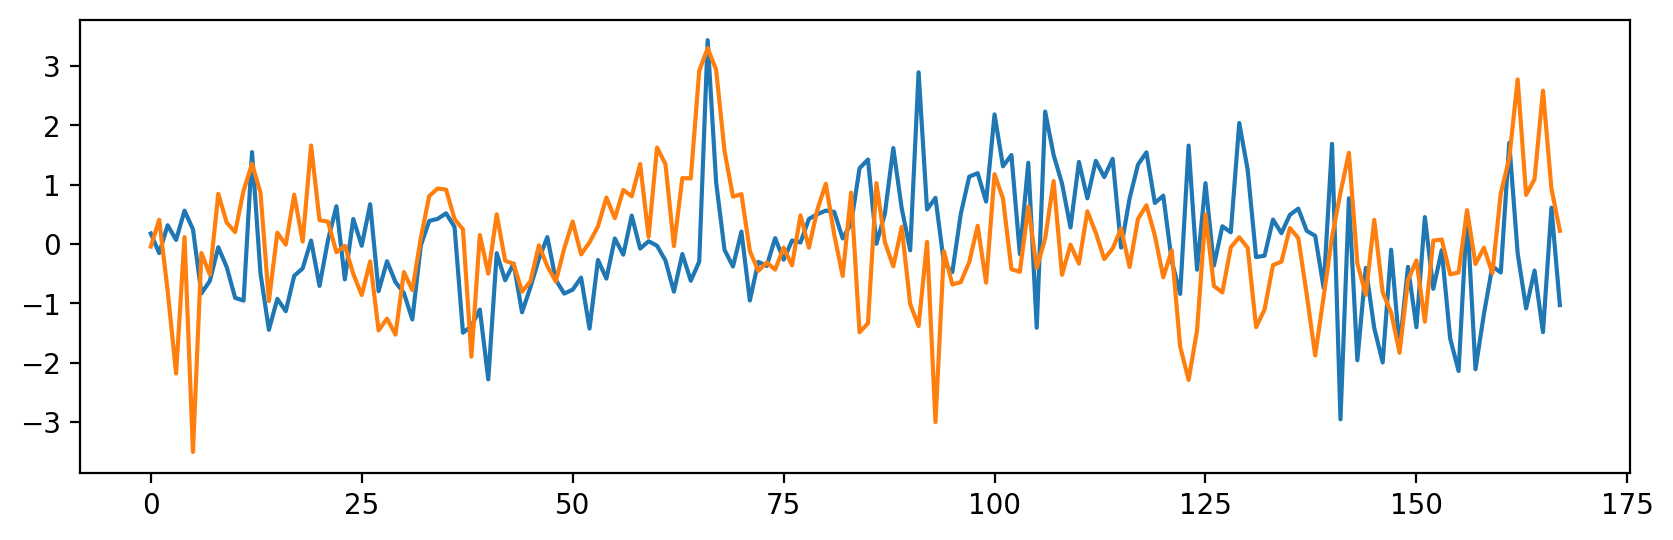

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3), dpi=200)
plt.plot(braindata[1,:,0])
plt.plot(braindata[1,:,1])

In [4]:
with open('/kyb/rg/swu/Desktop/fmri_timeseries/fmri_learned_chunks.npy','rb') as f:
    fmri_learned_chunks = np.load(f, allow_pickle = True)

In [8]:
print(labels)

['L Aud', 'R Aud', 'Striate', 'L DMN', 'Med DMN', 'Front DMN', 'R DMN', 'Occ post', 'Motor', 'R DLPFC', 'R Front pol', 'R Par', 'R Post Temp', 'Basal', 'L Par', 'L DLPFC', 'L Front pol', 'L IPS', 'R IPS', 'L LOC', 'Vis', 'R LOC', 'D ACC', 'V ACC', 'R A Ins', 'L STS', 'R STS', 'L TPJ', 'Broca', 'Sup Front S', 'R TPJ', 'R Pars Op', 'Cereb', 'Dors PCC', 'L Ins', 'Cing', 'R Ins', 'L Ant IPS', 'R Ant IPS']


In [ ]:
from nilearn import datasets
# dataset = datasets.fetch_atlas_msdl()
# #dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
# atlas_filename = dataset.maps

atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']


[NiftiMapsMasker.inverse_transform] computing image from signals


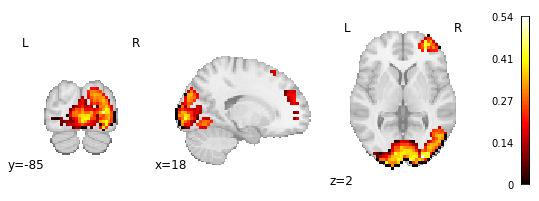

['Occ post', 'R DLPFC', 'R Front pol', 'R LOC', 'R A Ins']
t = 0
['Occ post', 'R V Att', 'R V Att', 'Vis Sec', 'Salience']
subject is  0
index = 82
frequency = {4.0}
[NiftiMapsMasker.inverse_transform] computing image from signals


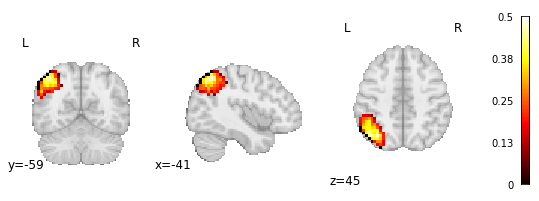

['R Post Temp', 'L Par', 'R Pars Op']
t = 0
['R V Att', 'L V Att', 'Language']
subject is  0
index = 236
frequency = {4.0}
[NiftiMapsMasker.inverse_transform] computing image from signals


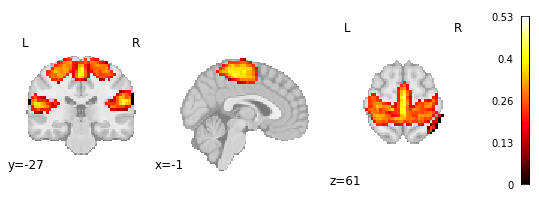

['Motor', 'R Par', 'L STS', 'R STS']
t = 0
['Motor', 'R V Att', 'Temporal', 'Temporal']
subject is  0
index = 312
frequency = {4.0}
[NiftiMapsMasker.inverse_transform] computing image from signals


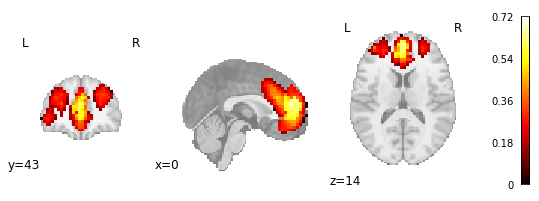

['Front DMN', 'L Front pol', 'D ACC', 'V ACC', 'R A Ins']
t = 0
['DMN', 'L V Att', 'Salience', 'Salience', 'Salience']
subject is  1
index = 104
frequency = {4.0}
[NiftiMapsMasker.inverse_transform] computing image from signals


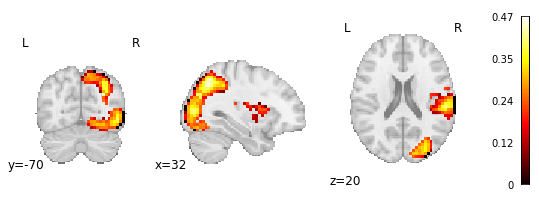

['R IPS', 'R LOC', 'R STS']
t = 0
['D Att', 'Vis Sec', 'Temporal']
subject is  1
index = 255
frequency = {4.0}
[NiftiMapsMasker.inverse_transform] computing image from signals


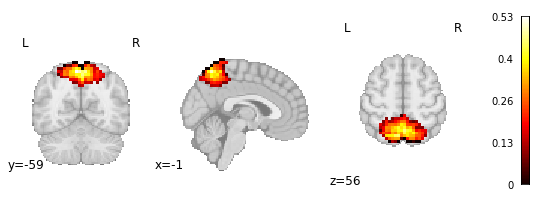

['Dors PCC', 'L Ins', 'R Ins']
t = 0
['Dors PCC', 'Cing-Ins', 'Cing-Ins']
subject is  2
index = 312
frequency = {4.0}
[NiftiMapsMasker.inverse_transform] computing image from signals


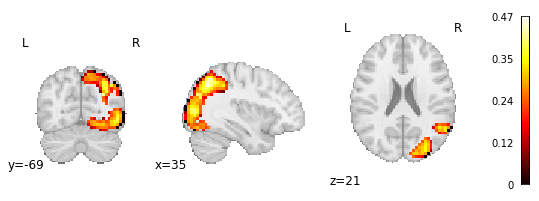

['R DMN', 'R IPS', 'R LOC']
t = 0
['DMN', 'D Att', 'Vis Sec']
subject is  3
index = 155
frequency = {4.0}
[NiftiMapsMasker.inverse_transform] computing image from signals


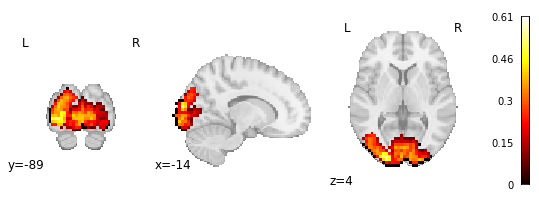

['Occ post', 'L LOC', 'R Ant IPS']
t = 0
['Occ post', 'Vis Sec', 'Ant IPS']
subject is  3
index = 168
frequency = {5.0}
[NiftiMapsMasker.inverse_transform] computing image from signals


KeyboardInterrupt: 

In [12]:
with open('/kyb/rg/swu/Desktop/fmri_timeseries/fmri_chunk_data/fmri_chunk_data_msdl/fmri_learned_chunks.npy','rb') as f:
    fmri_learned_chunks = np.load(f, allow_pickle = True)
    

from nilearn import image
from nilearn.plotting import plot_stat_map, show
from nilearn import plotting, image


mean_img = image.mean_img(atlas_filename)

component_array = np.zeros([len(fmri_learned_chunks), time_series.shape[1]])
pc = []

sub = 1
for sub in range(0,155):
    for i in range(0, len(fmri_learned_chunks[sub][0])):
        ck = fmri_learned_chunks[sub][0][i][0][:,:,0]
        freq = fmri_learned_chunks[sub][0][i][1]
        if sum(ck.flatten()!=0)>=3 and freq >=4:# threshold of chunk patterns
            for j in range(0, ck.shape[0]):# this is the temporal dimension
                component_img = masker.inverse_transform(ck)
                plot_stat_map(image.index_img(component_img, j),draw_cross = False)# + ' n = %s' % freq)
                show()
                # also print out brain regions associated with each time point
                print(list(np.array(labels[0:])[ck[j,:].flatten()!=0]))
                print('t = %d' % j)
                print(list(np.array(atlas['networks'])[ck[j,:].flatten()>0]))
                print('subject is ', sub)
                print('index = %d' % i)
                print('frequency = %s' % {fmri_learned_chunks[sub][0][i][1]})


# fig 1 hierarchical relationships between brain activations

In [13]:
import numpy as np
import sys
import operator
import networkx as nx
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import json
import PIL

# ['L LOC', 'Vis', 'R LOC', 'L TPJ', 'R TPJ', 'L Ins']
# t = 0
# ['Vis Sec', 'Vis Sec', 'Vis Sec', 'Language', 'Language', 'Cing-Ins']
# subject is  115
# index = 264
# frequency = {3.0}
#sub = 115
sub = 127
filepath = './fmri_chunk_data/fmri_chunk_data_msdl/subject'+ str(sub) + 'graphstructure.json'
#filepath = './graphstructure.json'
a_file = open(filepath, "r")
learned_graph = json.loads(a_file.read())
vertex_list = np.arange(0, len(learned_graph['vertex_location']))
vertex_location = learned_graph['vertex_location'] 
edge_list = learned_graph['edge_list']

In [14]:
def get_vertex_edge(v, elist, edgelist):        
    if np.sum(np.array(edge_list)[:,1] == v) == 0:
        return 
    else:
        vl = np.array(edge_list)[np.array(edge_list)[:,1] == v][0,0]
        vr = np.array(edge_list)[np.array(edge_list)[:,1] == v][1,0]
        elist.append([vl,v])
        elist.append([vr,v])
        get_vertex_edge(vl,elist,edgelist)
        get_vertex_edge(vr,elist,edgelist)
    return 

In [15]:
index = 214
elist = []
lolist = []
get_vertex_edge(index,elist, edge_list)
vlist = list(np.unique(np.array(elist).flatten()))

for s in vlist:
    lolist.append(vertex_location[s])


[NiftiMapsMasker.inverse_transform] computing image from signals


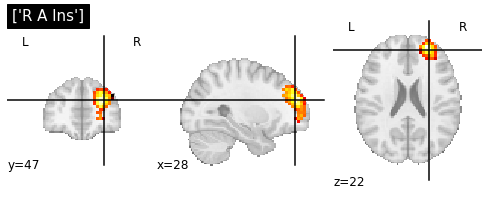

[NiftiMapsMasker.inverse_transform] computing image from signals


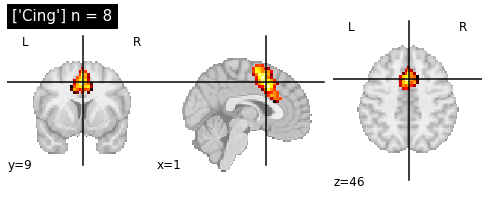

[NiftiMapsMasker.inverse_transform] computing image from signals


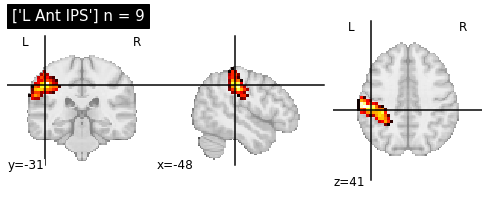

[NiftiMapsMasker.inverse_transform] computing image from signals


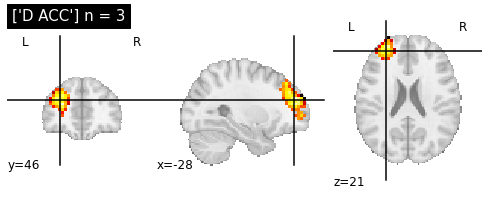

[NiftiMapsMasker.inverse_transform] computing image from signals


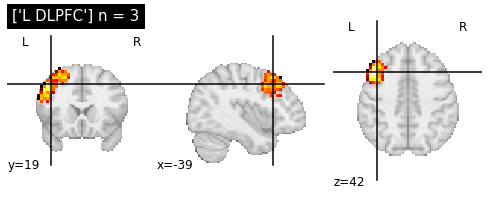

[NiftiMapsMasker.inverse_transform] computing image from signals


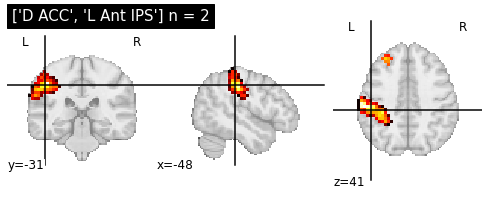

[NiftiMapsMasker.inverse_transform] computing image from signals


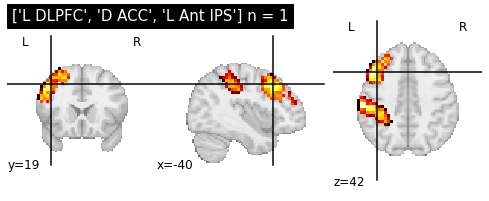

[NiftiMapsMasker.inverse_transform] computing image from signals


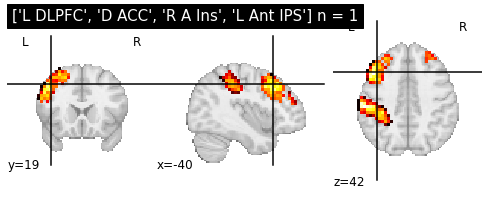

[NiftiMapsMasker.inverse_transform] computing image from signals


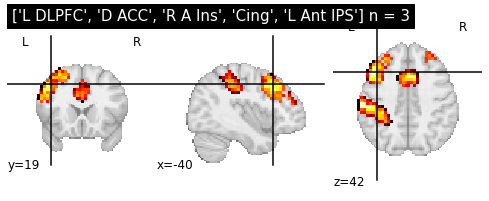

In [17]:
for i in vlist:
    ck = fmri_learned_chunks[sub][0][i][0][:,:,0]
    freq = fmri_learned_chunks[sub][0][i][1]
    for j in range(0, ck.shape[0]):# this is the temporal dimension
        component_img = masker.inverse_transform(ck)
        if freq >0:
            plot_stat_map(image.index_img(component_img, j),colorbar = False,title = str(list(np.array(labels)[ck[0,:].flatten()!=0])) + ' n = %s' % int(freq))
            show()
        else:
            plot_stat_map(image.index_img(component_img, j),colorbar = False,title = str(list(np.array(labels)[ck[0,:].flatten()!=0])))# + ' n = %s' % int(freq))
            show()

# fig 2 Age versus the number of chunks

In [82]:
# 0420 = 0422
with open('/kyb/rg/swu/Desktop/fmri_timeseries/fmri_chunk_data_0422/fmri_chunk_data/fmri_learned_chunks.npy','rb') as f:
    fmri_learned_chunks = np.load(f, allow_pickle = True)


In [83]:
age = []
n_chunk = []

nsub = 155

data = datasets.fetch_development_fmri(n_subjects=nsub)
for i in range(0, nsub):
    n_chunk.append(len(fmri_learned_chunks[i][0]))
    age.append(data.phenotypic[i][1])

[[1.         0.19034713]
 [0.19034713 1.        ]]


Text(0.5, 0, 'age')

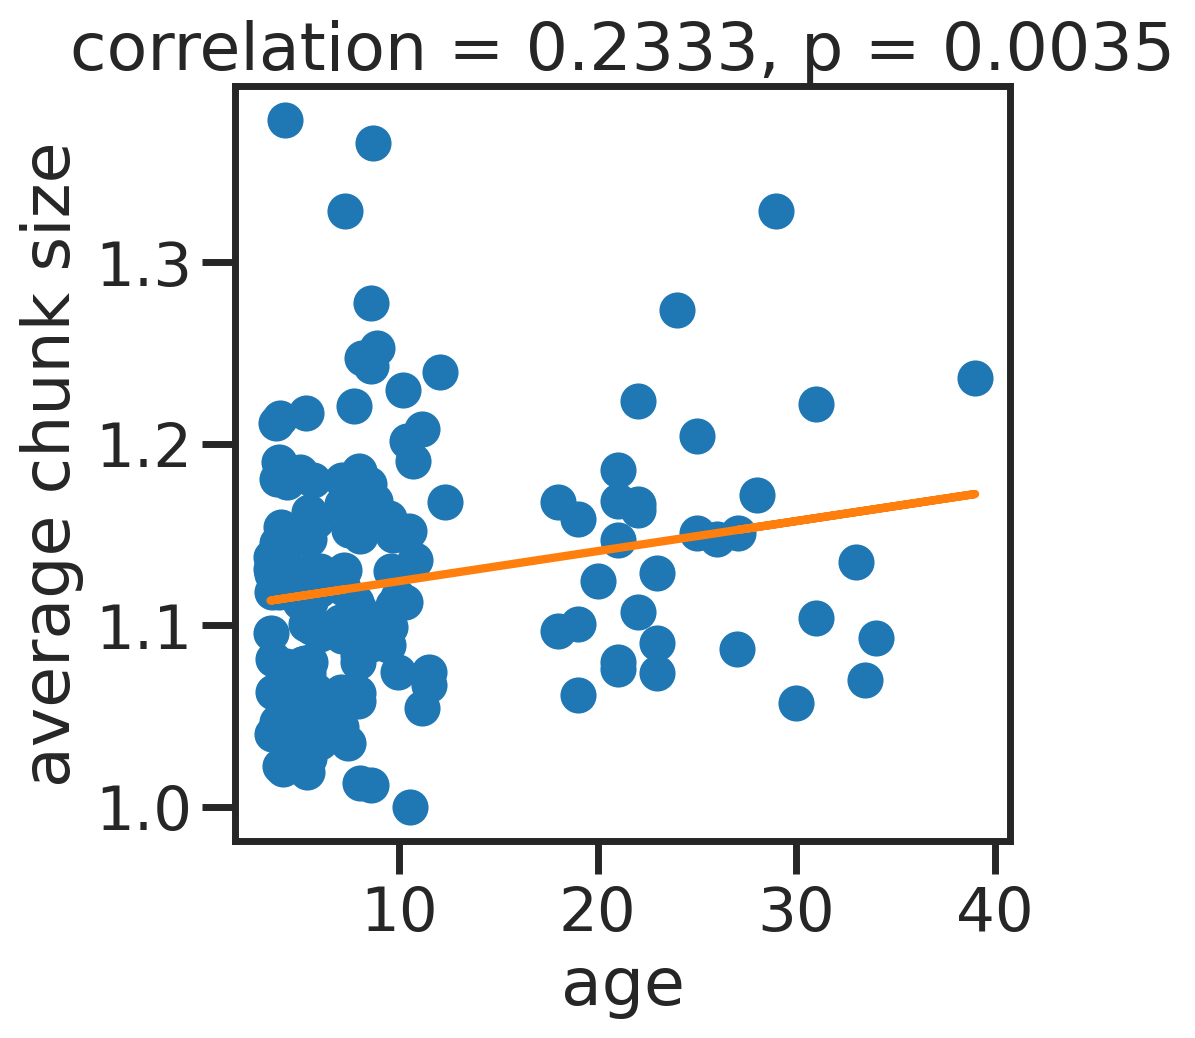

In [84]:
import scipy
age = []
avg_chunk_size = []

fmri_learned_chunks[1][1]

data = datasets.fetch_development_fmri(n_subjects=nsub)
#data.confounds
for i in range(0, nsub):
    cksize = 0
    n_ck = 0
    for j in range(0, len(fmri_learned_chunks[i][0])):# iterate through chunks
        ck = fmri_learned_chunks[i][0][j][0][:,:,0]
        cksize = cksize + sum(ck.flatten()!=0)
        n_ck = n_ck + 1
    avg_chunk_size.append(cksize/n_ck)
    age.append(data.phenotypic[i][1])

    
plt.figure(figsize = (5,5), dpi = 200)
x = np.array(age)
y = np.array(avg_chunk_size)
plt.plot(x,y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
r = np.corrcoef(x, y)
plt.title('correlation = %.4f, p = %.4f' % scipy.stats.spearmanr(x, y))
print(r)
plt.ylabel('average chunk size')
plt.xlabel('age')

In [89]:
# Divide the age into 3,4,5,7, 8-12, and adults 
avg_chunk_size = {'3':[],'4':[],'5':[],'7':[],'8-12':[],'adult':[]}

fmri_learned_chunks[1][1]

data = datasets.fetch_development_fmri(n_subjects=nsub)
#data.confounds
for i in range(0, nsub):
    cksize = 0
    n_ck = 0
    for j in range(0, len(fmri_learned_chunks[i][0])):# iterate through chunks
        ck = fmri_learned_chunks[i][0][j][0][:,:,0]
        cksize = cksize + sum(ck.flatten()!=0)
        n_ck = n_ck + 1
    age = data.phenotypic[i][1]
    if int(age) == 3:
        avg_chunk_size['3'].append(cksize/n_ck)
    elif int(age) == 4:
        avg_chunk_size['4'].append(cksize/n_ck)
    elif int(age) == 5:
        avg_chunk_size['5'].append(cksize/n_ck)
    elif int(age) == 7:
        avg_chunk_size['7'].append(cksize/n_ck)
    elif age >=8 and age <=12:
        avg_chunk_size['8-12'].append(cksize/n_ck)
    elif age >=18:
        avg_chunk_size['adult'].append(cksize/n_ck)
 

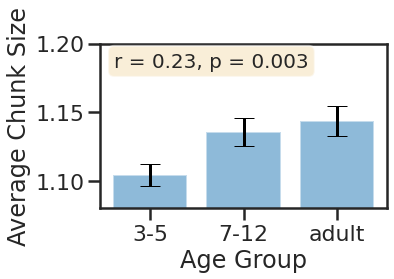

In [91]:
import seaborn as sns
# Calculate the average
mean3t5 = np.mean(avg_chunk_size['3'] + avg_chunk_size['4'] + avg_chunk_size['5'])
mean7t12 = np.mean(avg_chunk_size['7']+avg_chunk_size['8-12'])
meanadult = np.mean(avg_chunk_size['adult'])

# Calculate the average
std3t5 = np.std(avg_chunk_size['3'] + avg_chunk_size['4'] + avg_chunk_size['5'])/np.sqrt(len(avg_chunk_size['3'] + avg_chunk_size['4'] + avg_chunk_size['5']))
std7t12 = np.std(avg_chunk_size['7']+avg_chunk_size['8-12'])/np.sqrt(len(avg_chunk_size['7']+avg_chunk_size['8-12']))
stdadult = np.std(avg_chunk_size['adult'])/np.sqrt(len(avg_chunk_size['adult']))

# Define labels, positions, bar heights and error bar heights
labels = ['3-5','7-12','adult']
x_pos = np.arange(len(labels))
CTEs = [mean3t5, mean7t12, meanadult]
error = [std3t5, std7t12, stdadult]
sns.set_style('ticks')
sns.set_context('poster')

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10,color = sns.color_palette('tab10')[0])
ax.set_ylabel('Average Chunk Size')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_xlabel('Age Group')
ax.yaxis.grid(False)
ax.set_ylim([1.08, 1.20])
# Save the figure and show
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, 'r = 0.23, p = 0.003', transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.tight_layout()
plt.savefig('ageaveragechunksize.png')
plt.show()


# Plot functional activity in correspondence to movie scenes

In [153]:
behavior = ['langhter','greetings, hug', 'bitten by crocadile, bird pretends to like it', 'Conversation with the cloud, to receive the second gift', 'getting hit by baby deer', 'watching other clouds having fun', 'Getting hit by baby deer and fly away' ,'Bird being hurt by hedgehog','cloud takes the spikes out of birds head', 'compassionate hug','cloud shows bird a shark that he has made', 'other clouds having fun', 'interaction with the gray cloud', 'anger','sadness','interaction with the cloud','hug','conversation between the bird and the cloud', 'Electric shock from the fish']
behavioraltime = [[(1,32),(1,36)],[(2,3),(2,9)],[(2,13),(2,15)],[(2,41),(2,45)],[(2,45),(2,48)],[(2,53),(3,0)],[(3,10),(3,14)],[(3,20),(3,38)],[(3,47),(3,51)],[(3,52),(3,53)],[(3,53),(3,57)],[(3,58),(4,2)],[(4,2),(4,10)],[(4,14),(4,22)],[(4,38),(4,40)],[(4,53),(5,5)],[(5,3),(5,4)],[(5,6),(5,9)],[(5,10),(5,11)]]

In [154]:
def minutes_to_ts(Min, Sec):
    # 10 s blank screen 
    return int((Min*60 + Sec + 10)/2)

def tagduration(smin, ssec, emin, esec, array):
    sts = minutes_to_ts(smin, ssec)
    ets = minutes_to_ts(emin, esec)
    array[:,sts:ets+1] = 1
    return array

In [155]:
for i in range(0, len(behavior)):
    print(i, behavior[i])

0 langhter
1 greetings, hug
2 bitten by crocadile, bird pretends to like it
3 Conversation with the cloud, to receive the second gift
4 getting hit by baby deer
5 watching other clouds having fun
6 Getting hit by baby deer and fly away
7 Bird being hurt by hedgehog
8 cloud takes the spikes out of birds head
9 compassionate hug
10 cloud shows bird a shark that he has made
11 other clouds having fun
12 interaction with the gray cloud
13 anger
14 sadness
15 interaction with the cloud
16 hug
17 conversation between the bird and the cloud
18 Electric shock from the fish


In [156]:
painidx = [2,4,6,7,8,18]
sociemoidx = [0,1,2,3,5,9,10,11,12,15,17]
compassionidx = [1,9,16]
angeridx = [13]
sadness = [14]

behavior = ['social','social','compassion','social','pain','social','pain','social','pain','pain','pain','compassion','social','social','social','social','anger','sadness','social','compassion','social','pain'] # 'Electric shock from the fish']
behavioraltime = [[(1,32),(1,36)],[(2,3),(2,9)],[(2,3),(2,9)],[(2,13),(2,15)],[(2,13),(2,15)],[(2,41),(2,45)],[(2,45),(2,48)],[(2,53),(3,0)],[(3,10),(3,14)],[(3,20),(3,38)],[(3,47),(3,51)],[(3,52),(3,53)],[(3,52),(3,53)],[(3,53),(3,57)],[(3,58),(4,2)],[(4,2),(4,10)],[(4,14),(4,22)],[(4,38),(4,40)],[(4,53),(5,5)],[(5,3),(5,4)],[(5,6),(5,9)],[(5,10),(5,11)]] #

In [157]:
with open('/kyb/rg/swu/Desktop/fmri_timeseries/fmri_chunk_data/fmri_chunk_data_msdl/fmri_learned_chunks.npy','rb') as f:
    fmri_learned_chunks_behavior = np.load(f, allow_pickle = True)



--------------------------------------------------------
behavior is:  langhter
starting time 51 ending time 53
--------------------------------------------------------
behavior is:  greetings, hug
starting time 66 ending time 69
 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


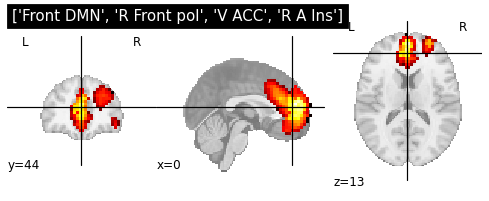

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


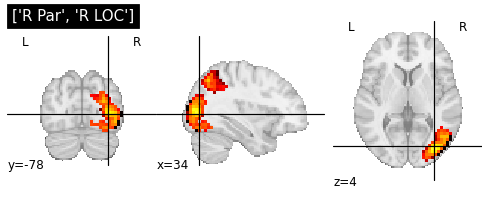

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


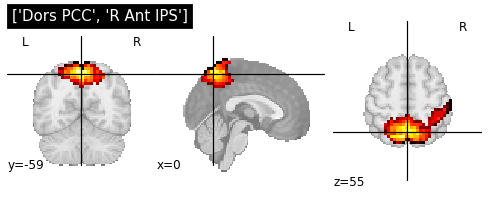

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


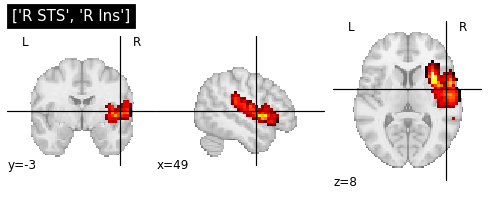

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


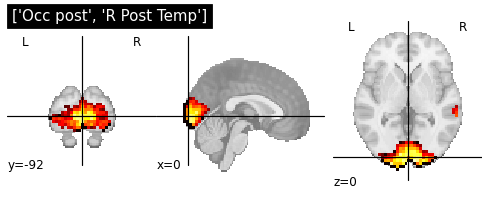

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


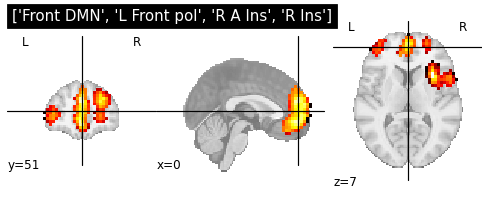

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


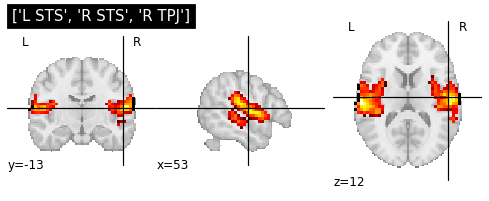

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


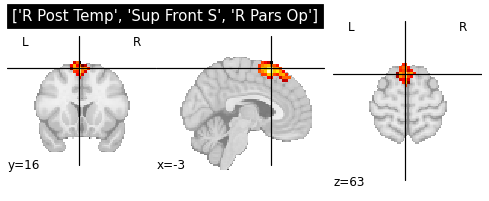

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


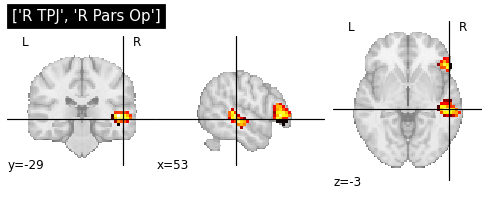

--------------------------------------------------------
behavior is:  bitten by crocadile, bird pretends to like it
starting time 71 ending time 72
 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


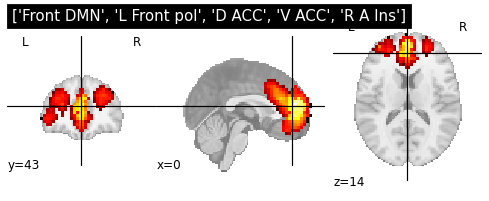

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


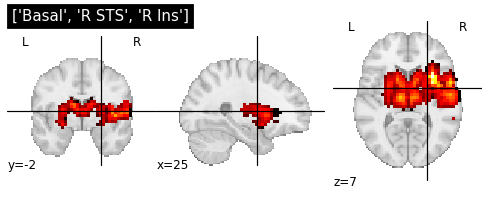

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


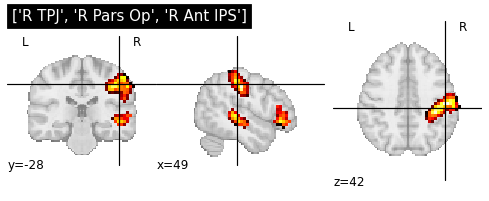

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


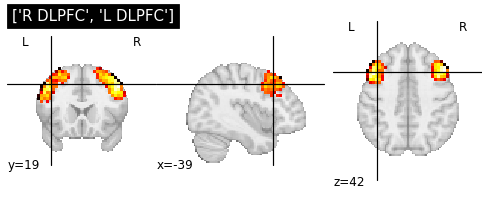

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


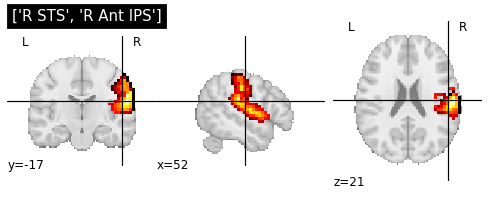

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


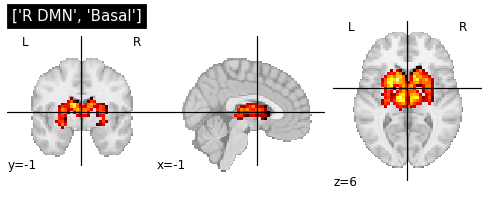

--------------------------------------------------------
behavior is:  Conversation with the cloud, to receive the second gift
starting time 85 ending time 87
 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


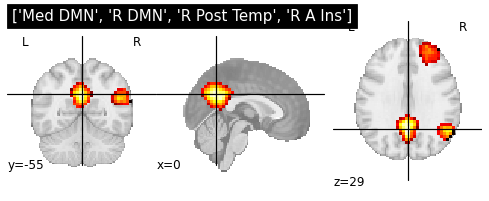

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


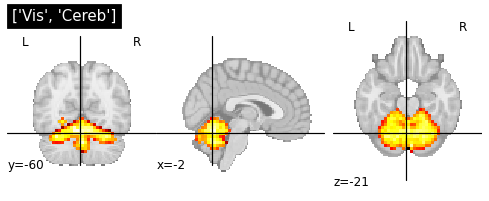

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


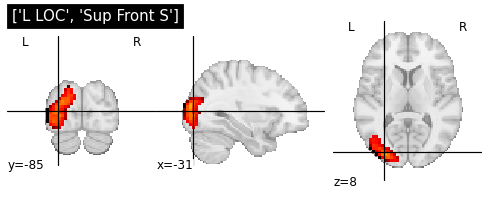

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


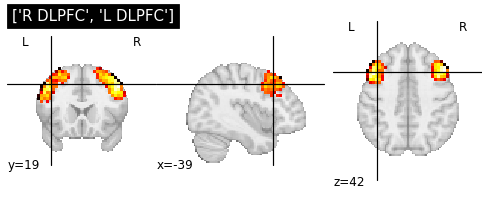

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


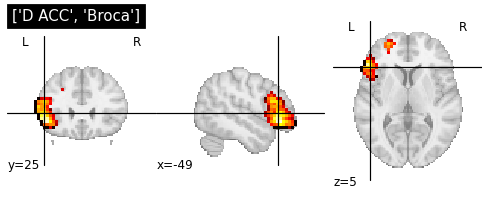

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


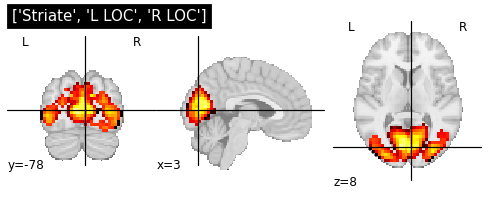

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


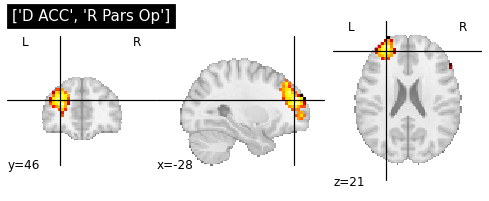

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


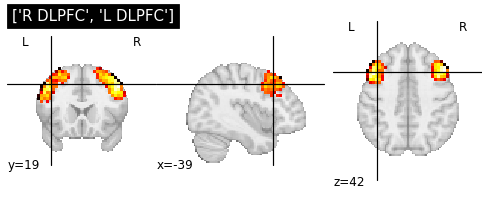

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


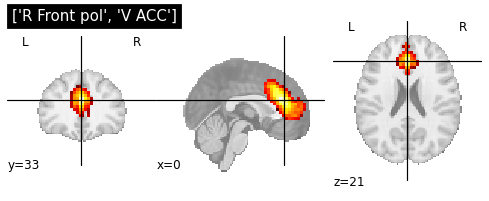

--------------------------------------------------------
behavior is:  getting hit by baby deer
starting time 87 ending time 89
 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


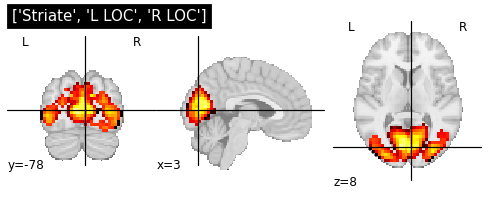

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


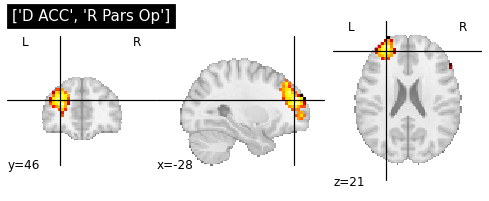

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


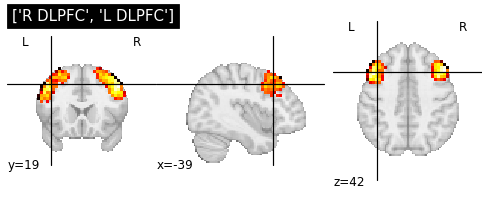

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


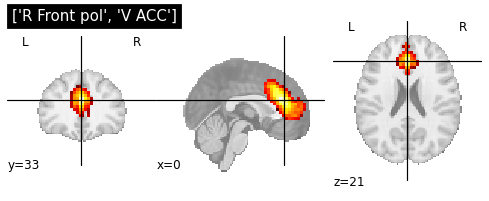

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


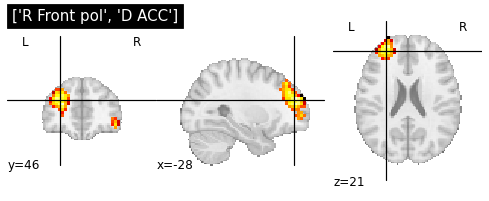

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


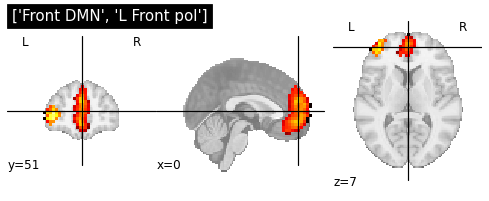

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


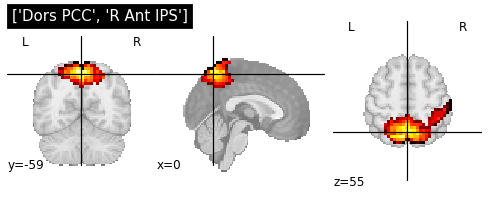

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


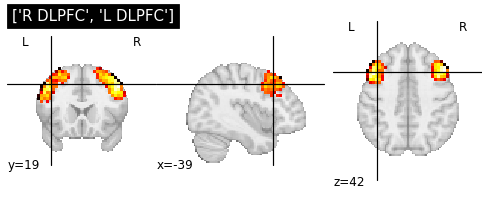

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


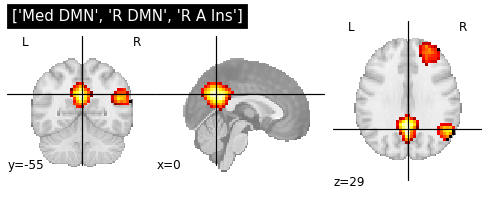

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


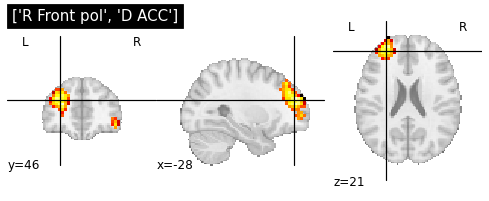

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


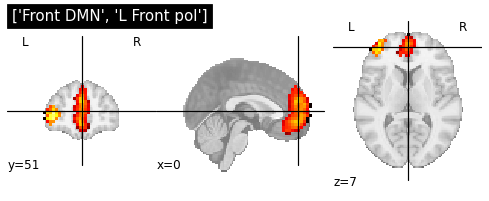

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


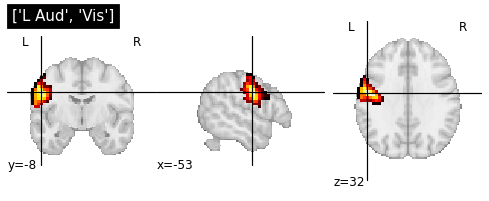

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


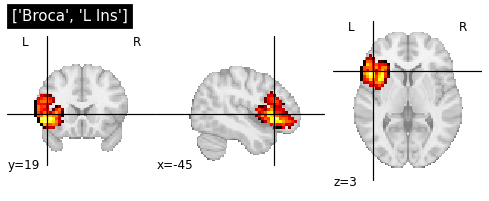

--------------------------------------------------------
behavior is:  watching other clouds having fun
starting time 91 ending time 95
 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


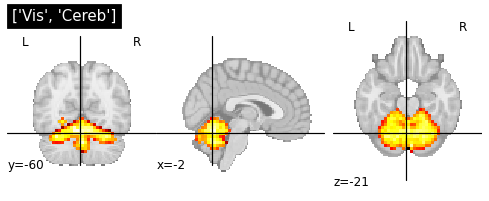

 time after event onset  0
[NiftiMapsMasker.inverse_transform] computing image from signals


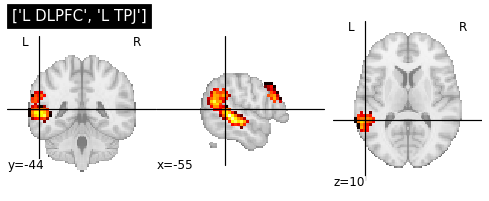

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


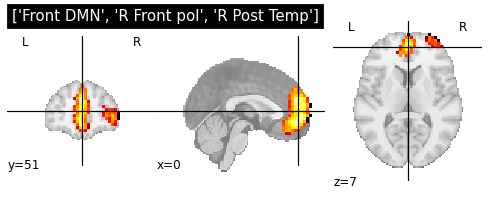

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


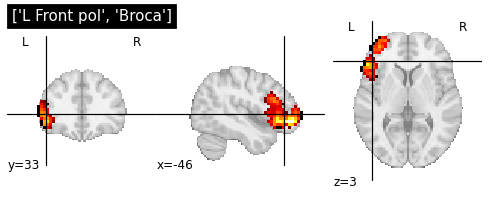

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


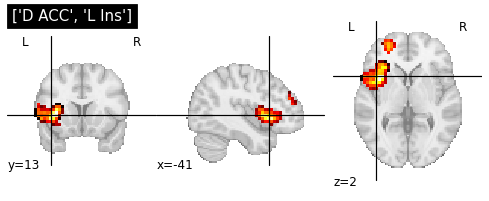

 time after event onset  1
[NiftiMapsMasker.inverse_transform] computing image from signals


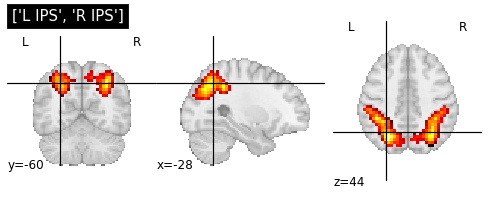

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


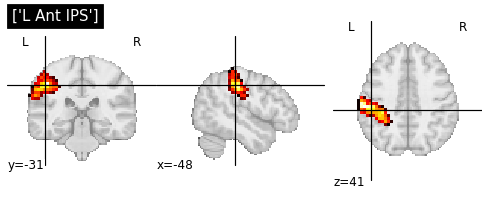

[NiftiMapsMasker.inverse_transform] computing image from signals


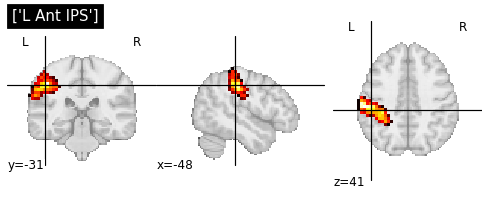

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


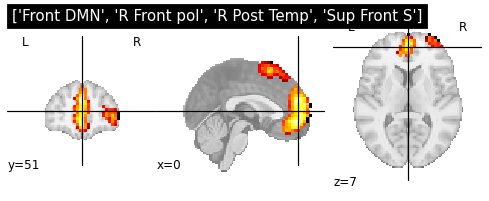

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


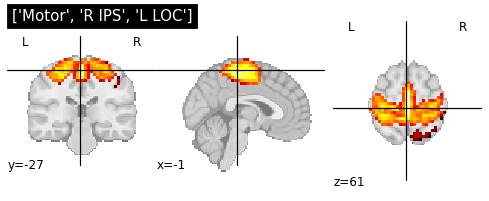

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


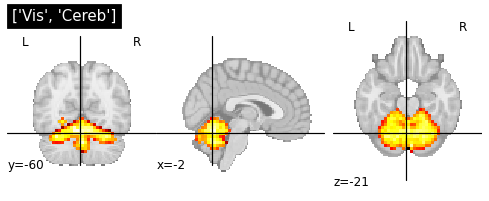

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


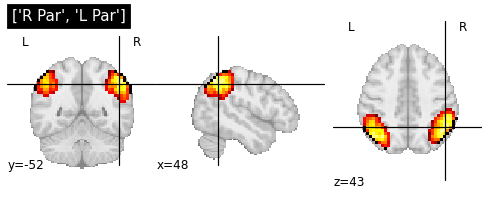

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


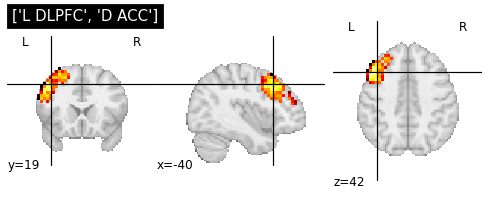

 time after event onset  2
[NiftiMapsMasker.inverse_transform] computing image from signals


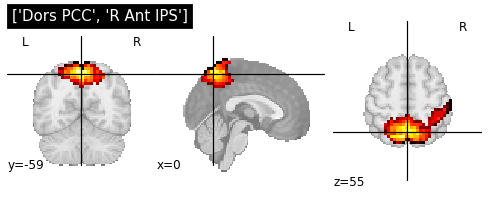

 time after event onset  3
[NiftiMapsMasker.inverse_transform] computing image from signals


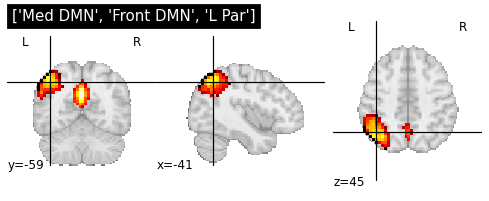

 time after event onset  3
[NiftiMapsMasker.inverse_transform] computing image from signals


KeyboardInterrupt: 

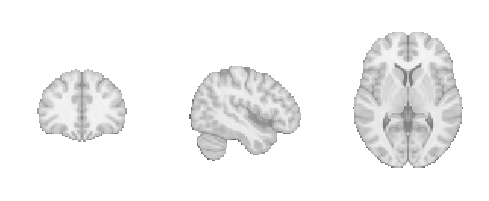

In [158]:
behavior = ['langhter','greetings, hug', 'bitten by crocadile, bird pretends to like it', 'Conversation with the cloud, to receive the second gift', 'getting hit by baby deer', 'watching other clouds having fun', 'Getting hit by baby deer and fly away' ,'Bird being hurt by hedgehog','cloud takes the spikes out of birds head', 'compassionate hug','cloud shows bird a shark that he has made', 'other clouds having fun', 'interaction with the gray cloud', 'anger','sadness','interaction with the cloud','hug','conversation between the bird and the cloud', 'Electric shock from the fish']
behavioraltime = [[(1,32),(1,36)],[(2,3),(2,9)],[(2,13),(2,15)],[(2,41),(2,45)],[(2,45),(2,48)],[(2,53),(3,0)],[(3,10),(3,14)],[(3,20),(3,38)],[(3,47),(3,51)],[(3,52),(3,53)],[(3,53),(3,57)],[(3,58),(4,2)],[(4,2),(4,10)],[(4,14),(4,22)],[(4,38),(4,40)],[(4,53),(5,5)],[(5,3),(5,4)],[(5,6),(5,9)],[(5,10),(5,11)]]

# The distribution of chunk responses in relation to behavior across time 
# iterate over subjects
# iterate across behavior 
# for each behavior, there are some distribution of chunks
# one thing can be to explore the common chunks amongst populations of groups 
# it can also be the case that there are some age wise differences

labels = atlas['labels']
tr = 1# time lag 
minsize = 1
sub = 1
# for beh in painidx:# iterate though behavioral index
for beh in range(0, len(behavior)):# iterate though behavioral index
    print('--------------------------------------------------------')
    print('behavior is: ', behavior[beh])
    start, end = behavioraltime[beh]
    sts = minutes_to_ts(*start)
    ets = minutes_to_ts(*end)
    print('starting time %.d ending time %d' % (sts, ets))
    onset = 0
    for t in range(sts,ets+tr):
        if t in list(fmri_learned_chunks_behavior[sub,1].keys()):
            for ckidx, freq in fmri_learned_chunks_behavior[sub,1][t]: #
                chunkarray, freq = fmri_learned_chunks_behavior[sub,0][ckidx]
                ck = chunkarray[:,:,0]
                if sum(ck.flatten()!=0)>minsize:
                    print(' time after event onset ', t-sts)
                    for j in range(0, ck.shape[0]):# this is the temporal dimension
                        component_img = masker.inverse_transform(ck)
                        if freq >0:
                            plot_stat_map(image.index_img(component_img, j),colorbar = False,title = str(list(np.array(labels)[ck[0,:].flatten()!=0])))# + ' n = %s' % int(freq))
                            show()
                        thischunklabel = list(np.array(labels[:])[ck[j,:].flatten()!=0])
                        # also print out brain regions associated with each time point
        onset = onset + 1

# Statistics about behavioral data


In [143]:
with open('/kyb/rg/swu/Desktop/fmri_timeseries/fmri_chunk_data/fmri_chunk_data_msdl/fmri_learned_chunks.npy','rb') as f:
    fmri_learned_chunks_behavior = np.load(f, allow_pickle = True)



In [149]:
behavior = ['social','social','compassion','social','pain','social','pain','social','pain','pain','pain','compassion','social','social','social','social','anger','sadness','social','compassion','social','pain'] # 'Electric shock from the fish']
behavioraltime = [[(1,32),(1,36)],[(2,3),(2,9)],[(2,3),(2,9)],[(2,13),(2,15)],[(2,13),(2,15)],[(2,41),(2,45)],[(2,45),(2,48)],[(2,53),(3,0)],[(3,10),(3,14)],[(3,20),(3,38)],[(3,47),(3,51)],[(3,52),(3,53)],[(3,52),(3,53)],[(3,53),(3,57)],[(3,58),(4,2)],[(4,2),(4,10)],[(4,14),(4,22)],[(4,38),(4,40)],[(4,53),(5,5)],[(5,3),(5,4)],[(5,6),(5,9)],[(5,10),(5,11)]] #
behavlen = {}
behavlen['social'] = 0
behavlen['compassion'] = 0
behavlen['pain'] = 0
behavlen['anger'] = 0
behavlen['sadness'] = 0

tr = 3# time lag 
for beh in range(0, len(behavior)):# iterate though behavioral index
    start, end = behavioraltime[beh]
    sts = minutes_to_ts(*start)
    ets = minutes_to_ts(*end)
    behavlen[behavior[beh]] += ets - sts + tr
    

In [150]:
# The distribution of chunk responses in relation to behavior across time 
# iterate over subjects
# iterate across behavior 
# for each behavior, there are some distribution of chunks
# one thing can be to explore the common chunks amongst populations of groups 
# it can also be the case that there are some age wise differences

behavior_chunk_data = {}
behavior_chunk_data['subject'] = []
behavior_chunk_data['behavior'] = []
behavior_chunk_data['chunk'] = []
behavior_chunk_data['age'] = []
behavior_chunk_data['timepoint'] = [] # time point after behavioral onset


tr = 3# time lag 
minsize = 1
for sub in range(0, nsub):     
    #for beh in painidx:# iterate though behavioral index
    for beh in range(0, len(behavior)):# iterate though behavioral index
        start, end = behavioraltime[beh]
        sts = minutes_to_ts(*start)
        ets = minutes_to_ts(*end)
        onset = 0
        for t in range(sts,ets+tr):
            if t in list(fmri_learned_chunks_behavior[sub,1].keys()):
                for ckidx, freq in fmri_learned_chunks_behavior[sub,1][t]: #
                    chunkarray, freq = fmri_learned_chunks_behavior[sub,0][ckidx]
                    ck = chunkarray[:,:,0]
                    if sum(ck.flatten()!=0)>minsize:
                        for j in range(0, ck.shape[0]):# this is the temporal dimension
                            thischunklabel = list(np.array(labels[:])[ck[j,:].flatten()!=0])
                            if thischunklabel!=[]:
                                behavior_chunk_data['subject'].append(sub)
                                behavior_chunk_data['age'].append(data.phenotypic[sub][1])
                                behavior_chunk_data['chunk'].append(str(thischunklabel))
                                behavior_chunk_data['behavior'].append(behavior[beh])
                                behavior_chunk_data['timepoint'].append(j+onset)
                                # also print out brain regions associated with each time point
            onset = onset + 1
            
            
import pickle
with open('behavior_chunk_data.pkl', 'wb') as f:
    pickle.dump(behavior_chunk_data,f)

In [159]:
df = pd.DataFrame.from_dict(behavior_chunk_data)

In [162]:
dfn = {}# a chunk normalized dataframe
dfn['subject'] = []
dfn['behavior'] = []
dfn['chunk'] = []
dfn['chunksize'] = []
dfn['chunkp'] = []
import ast

# find the unique chunks of each subject, and calculate their probability according to each behavior amongst each subject

for sub in np.unique(df['subject']):
    #print(sub)
    for chunk in np.unique(df[df['subject'] == sub]['chunk']):
        #print(chunk,len(list(chunk)))
        if len(df[(df['subject'] == sub) & (df['chunk'] == chunk)])>3:
            for behavior in ['social', 'compassion','pain','anger','sadness']: 
                ckn = len(df[(df['subject'] == sub) & (df['chunk'] == chunk) & (df['behavior'] == behavior)]) # how many times the behavior and the chunk happened
                cknb = behavlen[behavior]# how many times this chunk has happend
                dfn['subject'].append(sub)
                dfn['behavior'].append(behavior)
                dfn['chunk'].append(chunk)
                dfn['chunkp'].append(ckn/cknb)  
                dfn['chunksize'].append(len(ast.literal_eval(chunk)))
            
dfn = pd.DataFrame.from_dict(dfn)

subject:  0


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


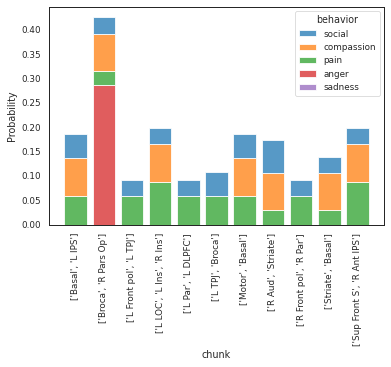

subject:  1


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


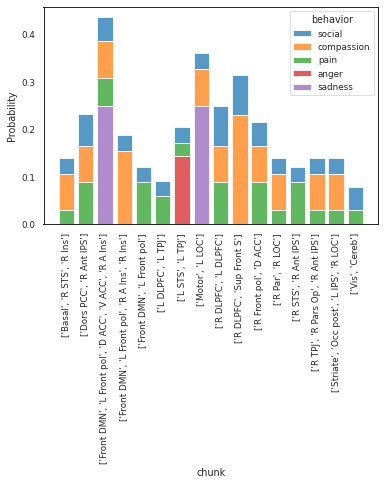

subject:  2


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


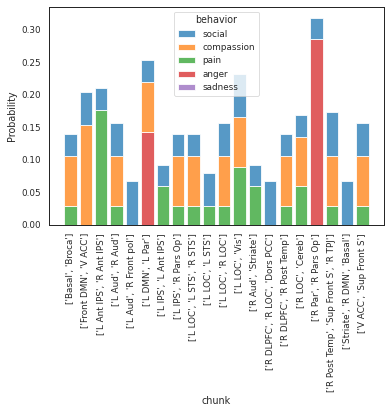

subject:  3


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


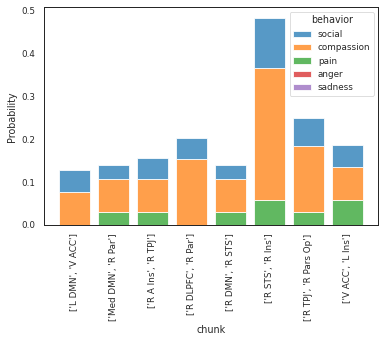

subject:  4


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


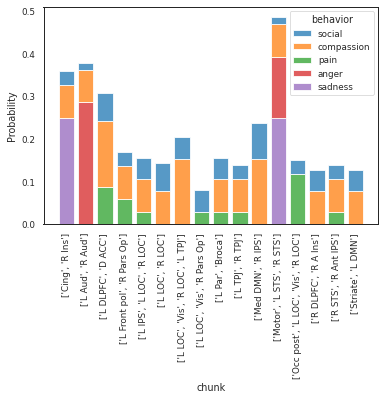

subject:  5


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


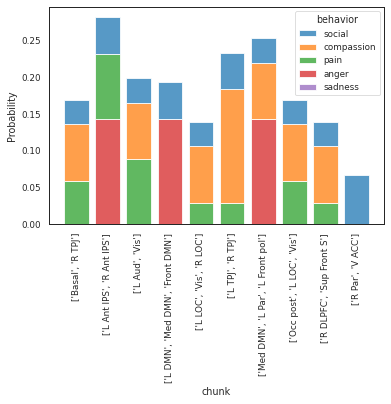

subject:  6


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


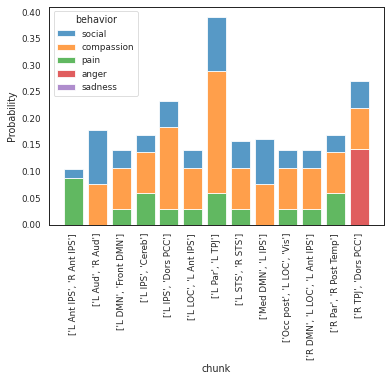

subject:  7


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


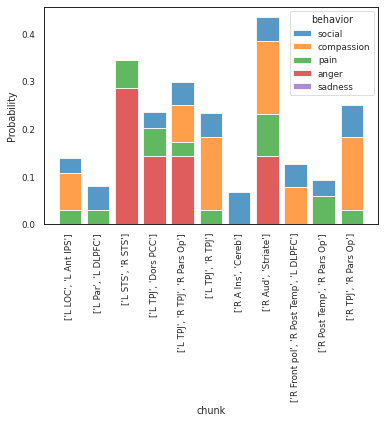

subject:  8


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


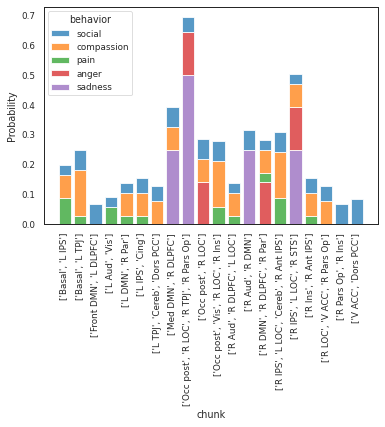

subject:  9


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


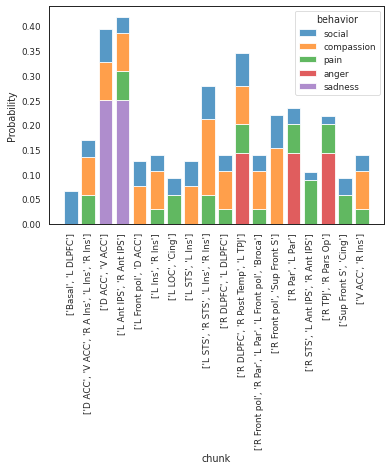

subject:  10


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


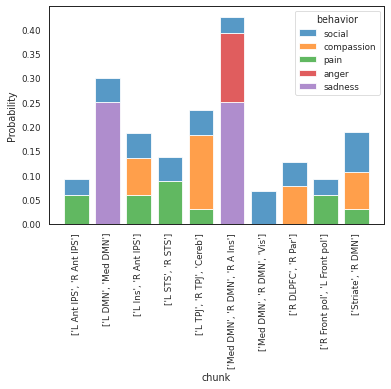

subject:  11


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


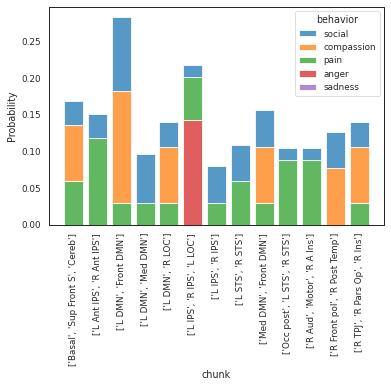

subject:  12


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


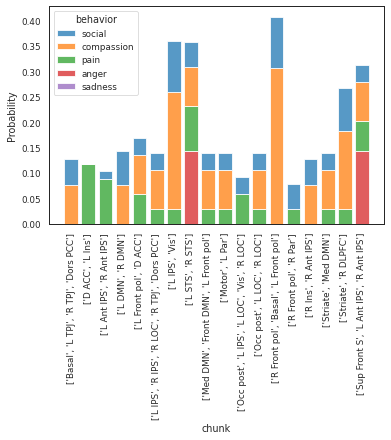

subject:  13


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


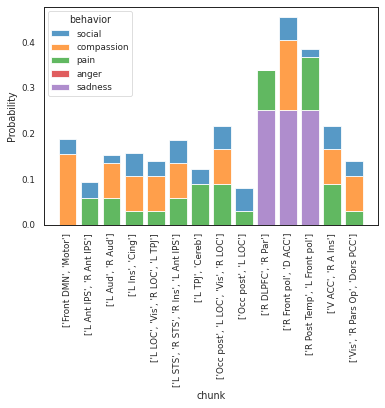

subject:  14


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


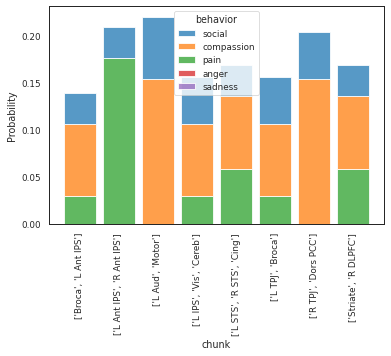

subject:  15


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


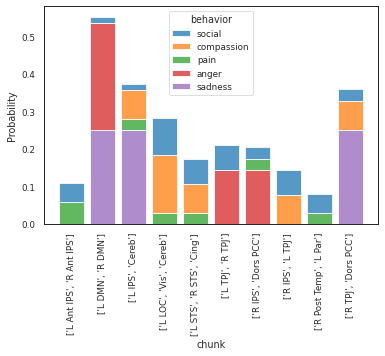

subject:  16


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


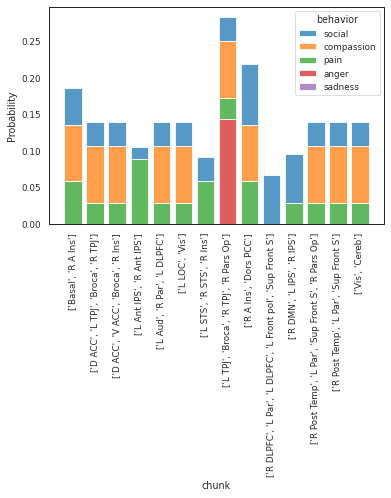

subject:  17


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


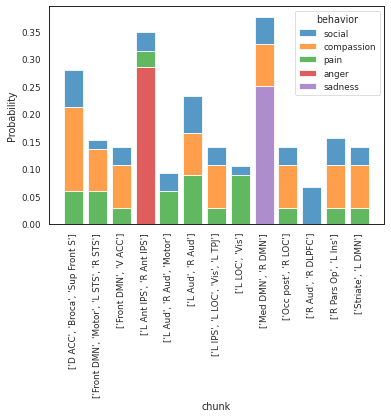

subject:  18


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


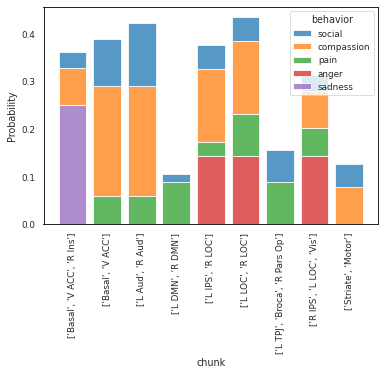

subject:  19


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


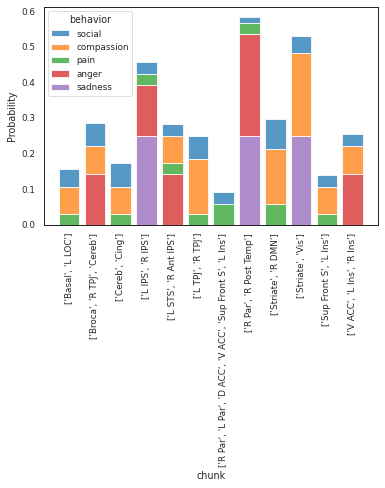

subject:  20


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


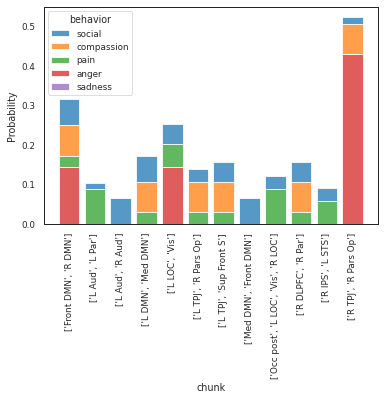

subject:  21


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


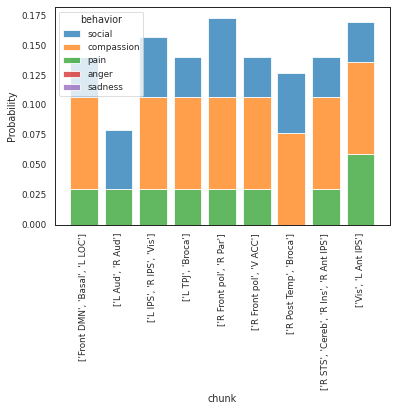

subject:  22


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


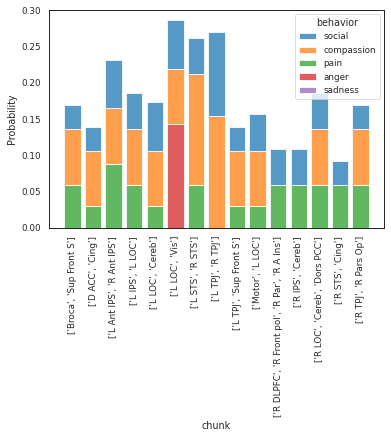

subject:  23


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


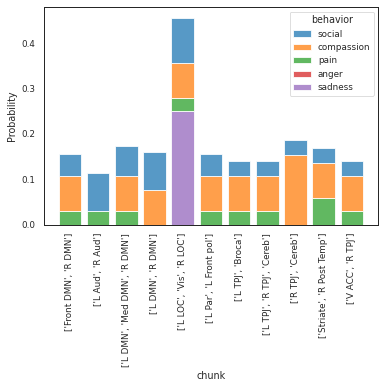

subject:  24


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


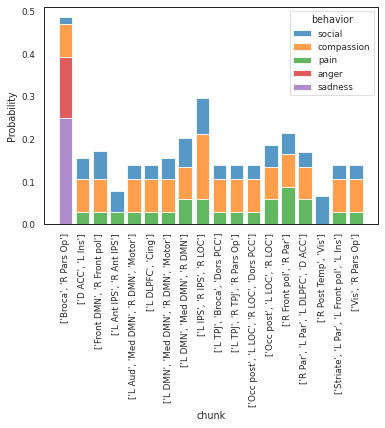

subject:  25


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


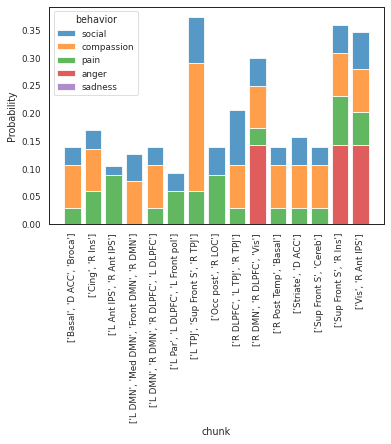

subject:  26


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


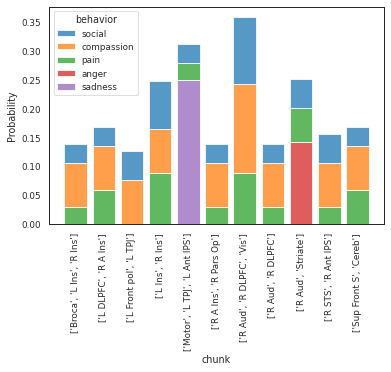

subject:  27


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


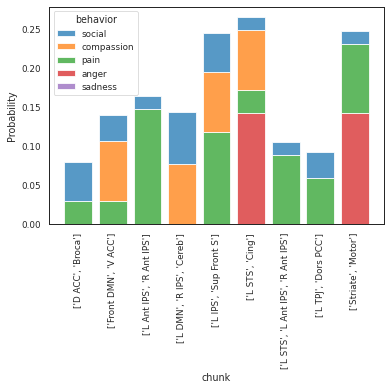

subject:  28


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


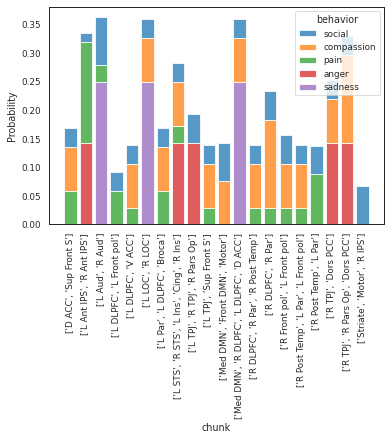

subject:  29


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


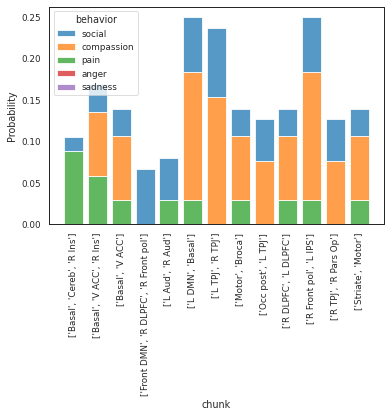

subject:  30


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


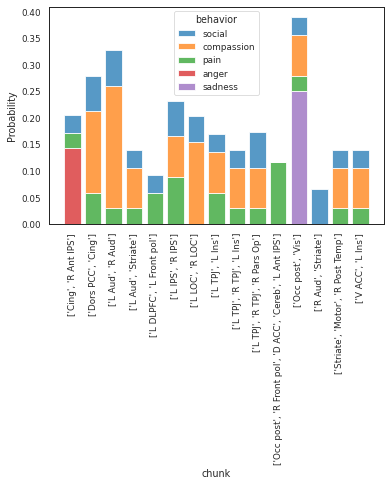

subject:  31


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


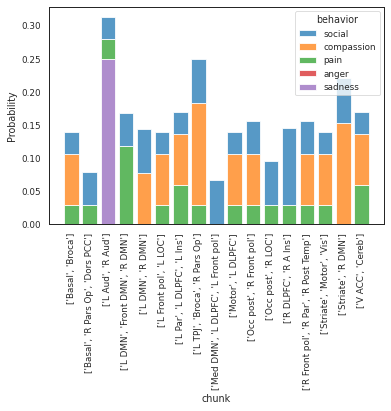

subject:  32


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


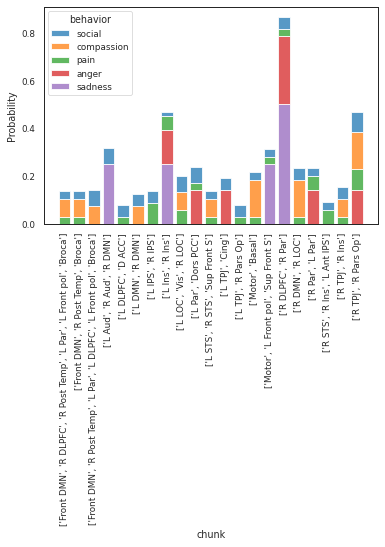

subject:  33


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


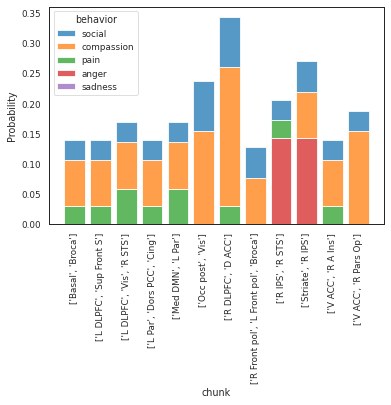

subject:  34


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


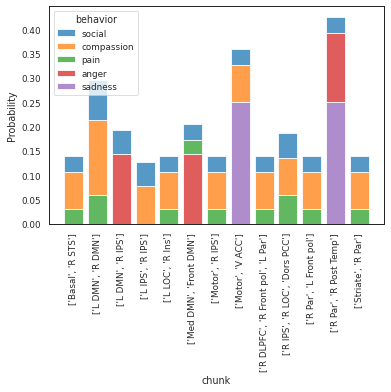

subject:  35


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


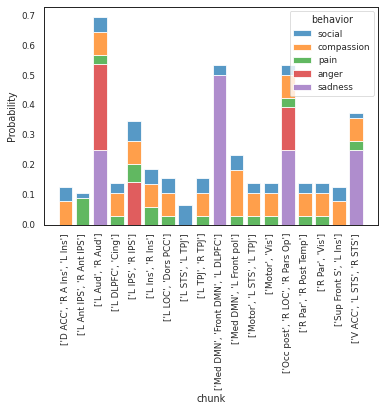

subject:  36


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


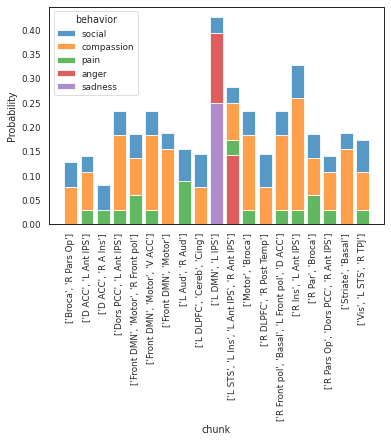

subject:  37


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


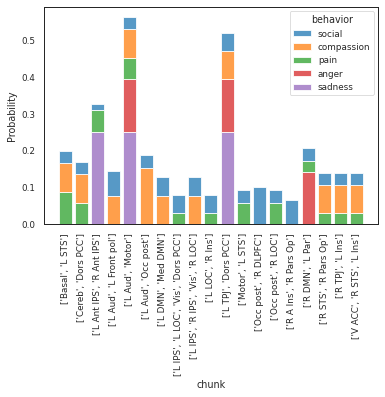

subject:  38


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


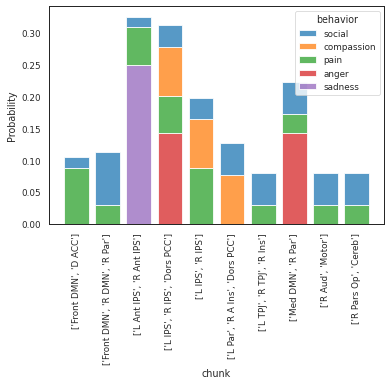

subject:  39


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


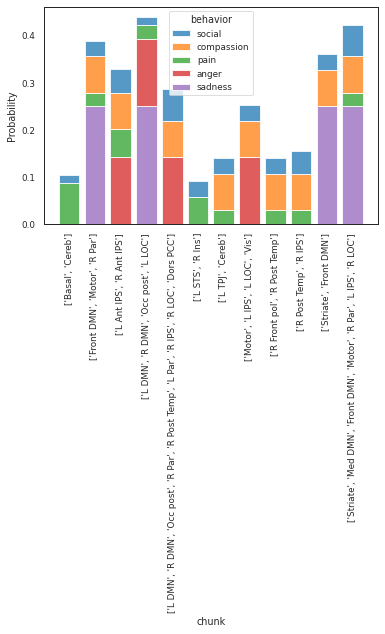

subject:  40


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


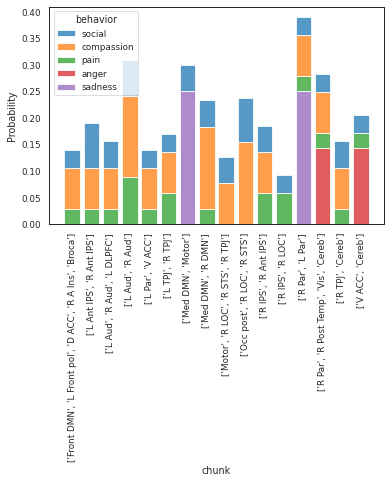

subject:  41


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


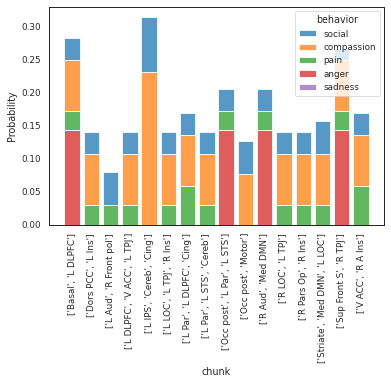

subject:  42


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


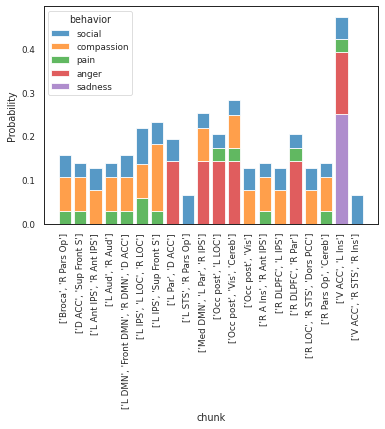

subject:  43


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


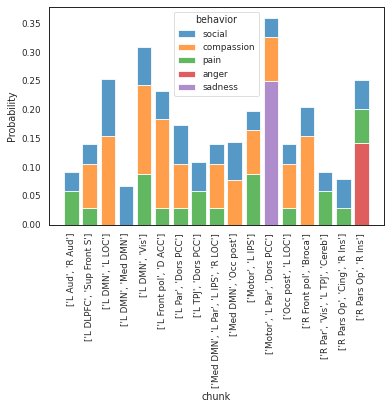

subject:  44


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


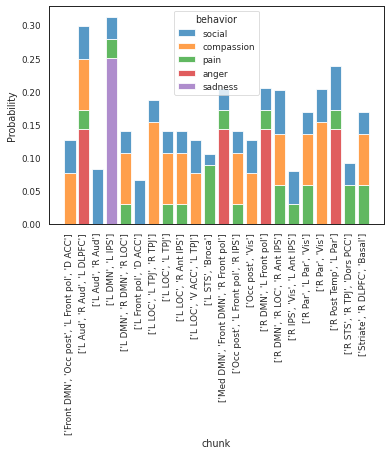

subject:  45


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


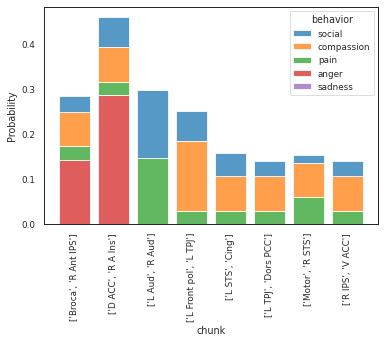

subject:  46


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


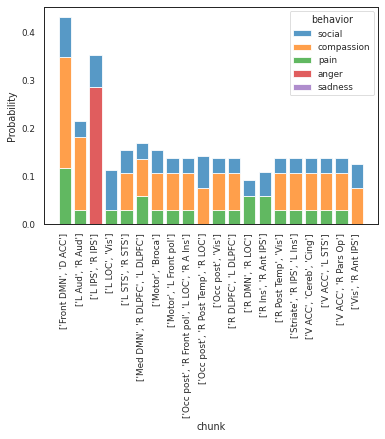

subject:  47


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


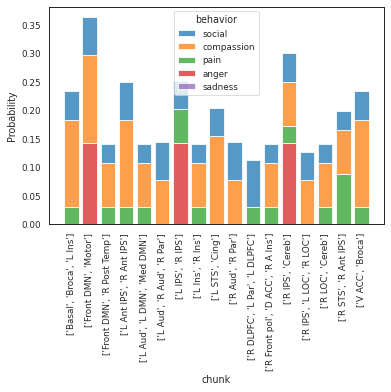

subject:  48


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


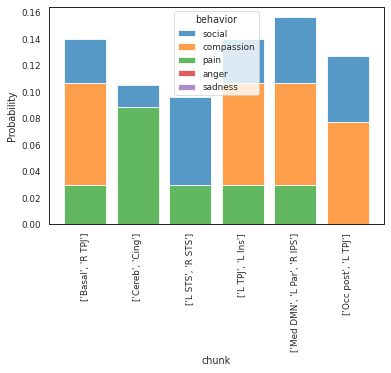

subject:  49


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


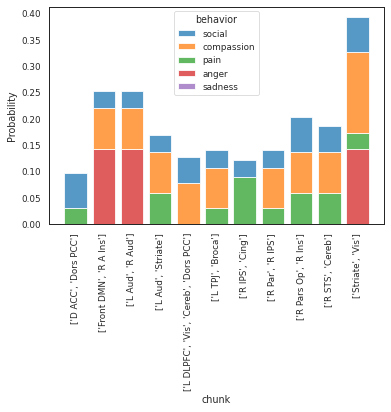

subject:  50


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


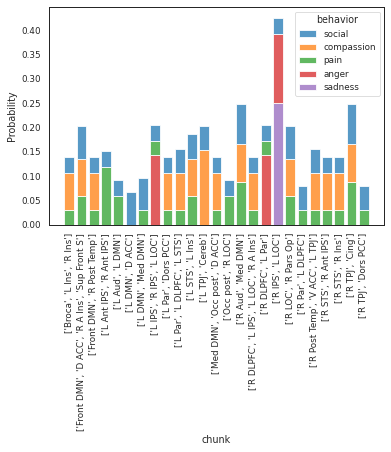

subject:  51


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


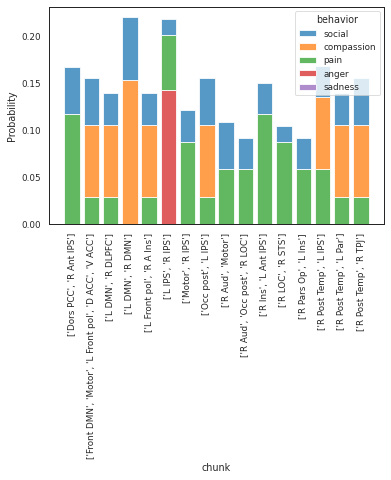

subject:  52


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


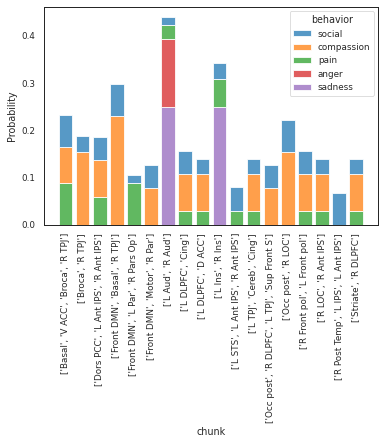

subject:  53


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


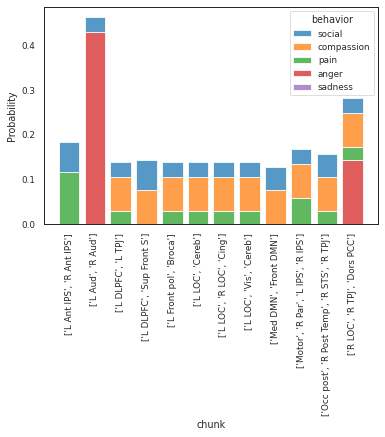

subject:  54


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


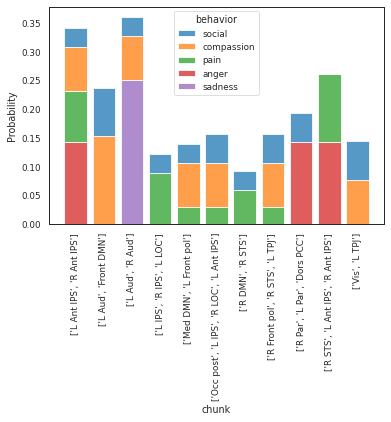

subject:  55


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


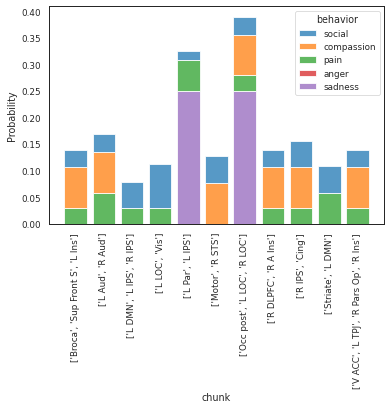

subject:  56


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


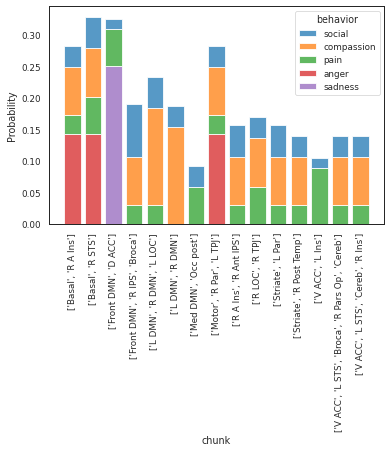

subject:  57


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


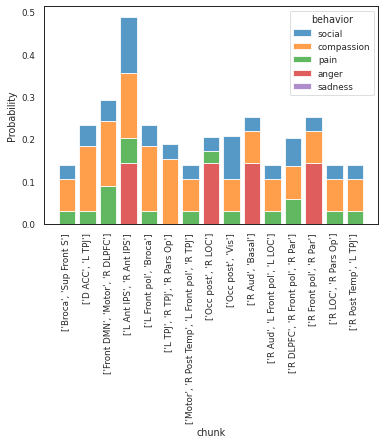

subject:  58


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


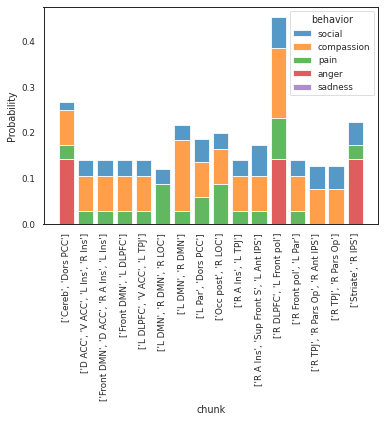

subject:  59


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


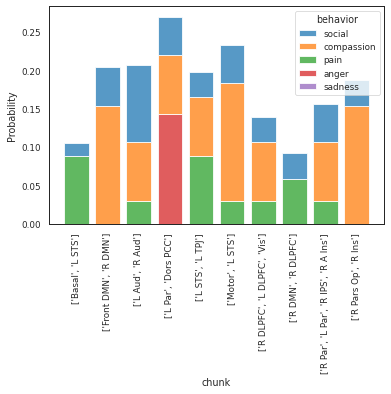

subject:  60


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


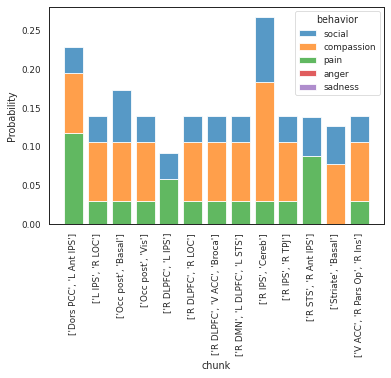

subject:  61


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


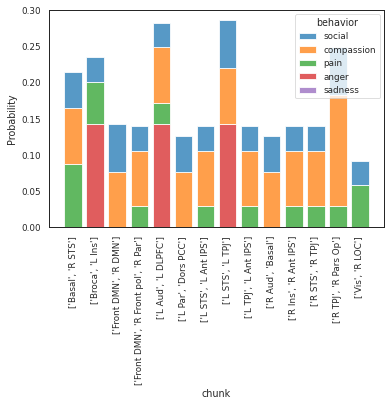

subject:  62


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


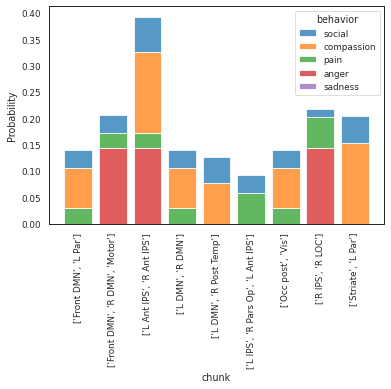

subject:  63


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


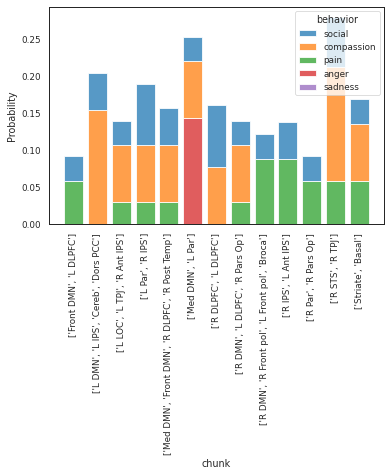

subject:  64


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


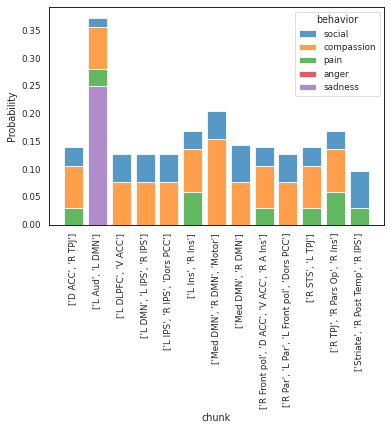

subject:  65


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


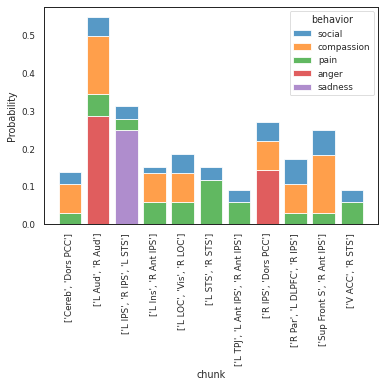

subject:  66


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


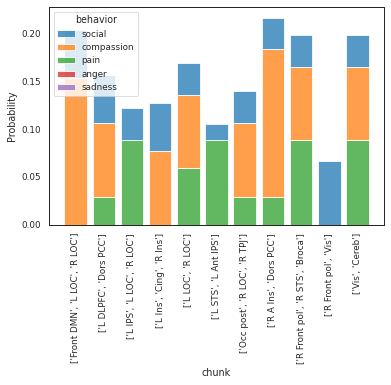

subject:  67


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


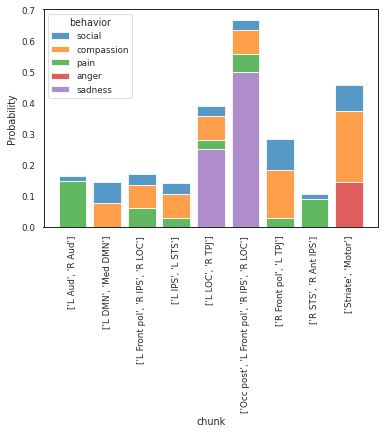

<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


subject:  68


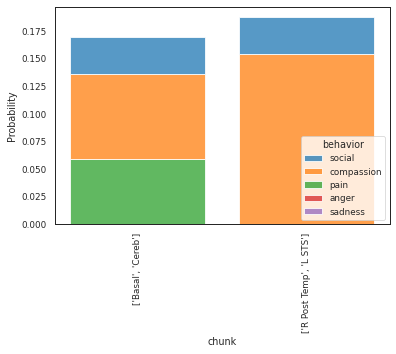

subject:  69


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


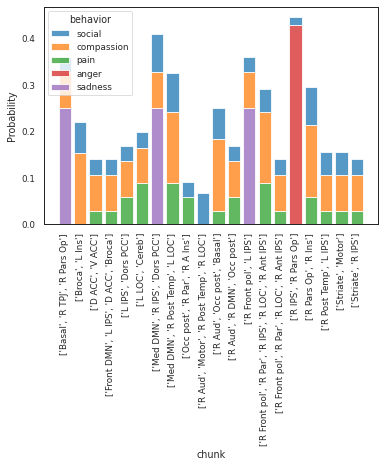

subject:  70


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


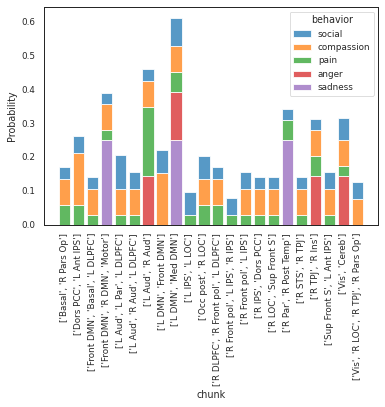

subject:  71


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


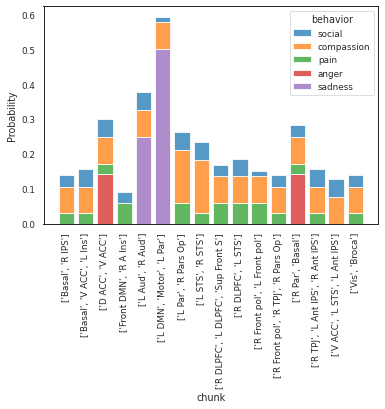

subject:  72


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


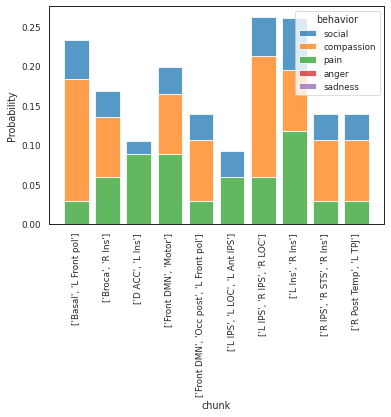

subject:  73


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


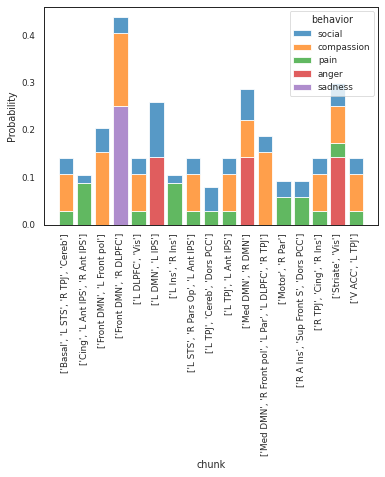

subject:  74


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


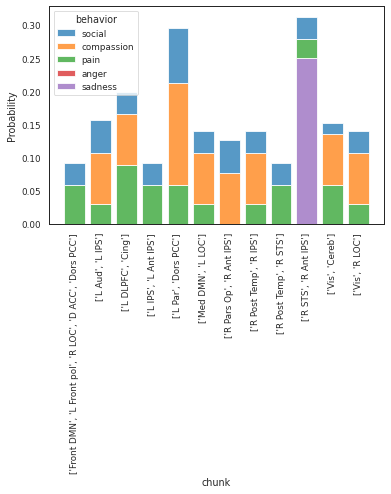

subject:  75


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


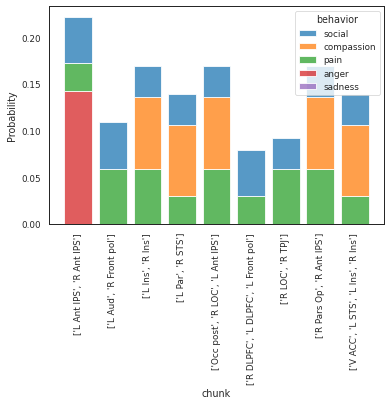

subject:  76


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


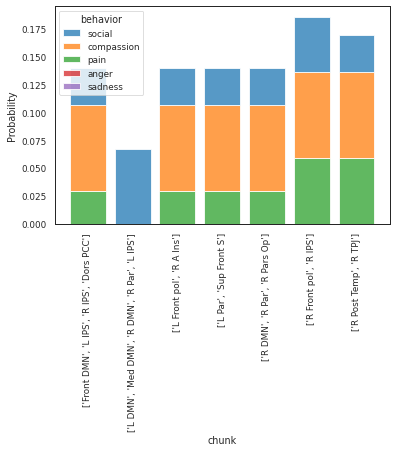

subject:  77


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


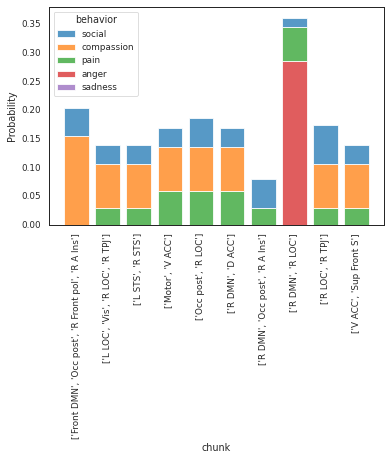

subject:  78


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


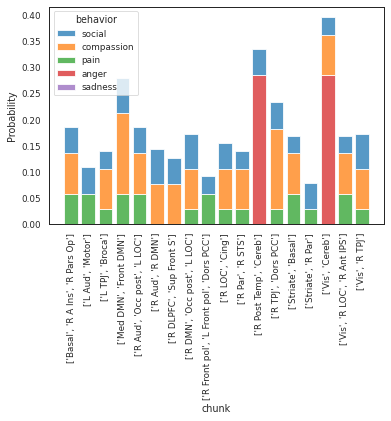

subject:  79


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


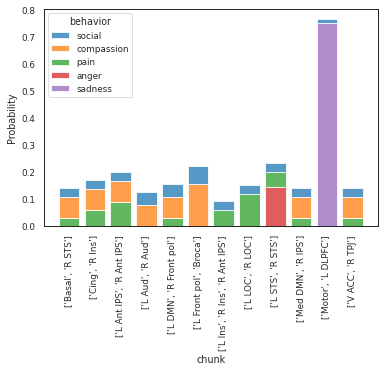

subject:  80


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


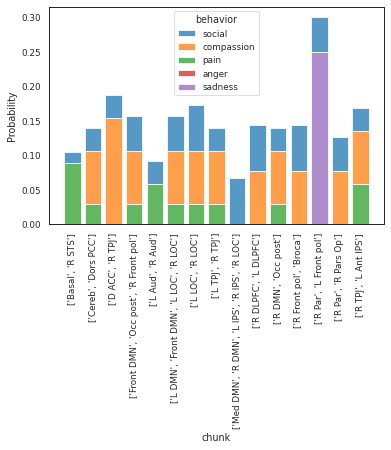

subject:  81


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


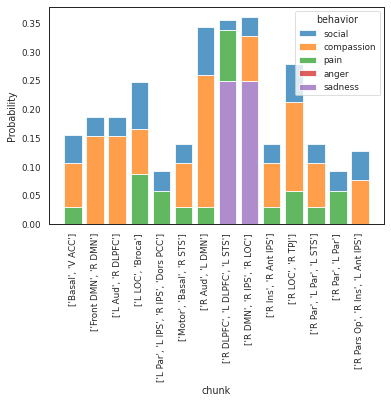

subject:  82


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


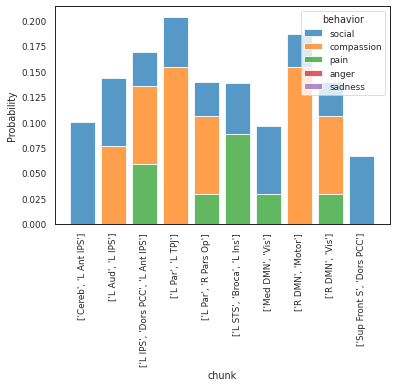

subject:  83


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


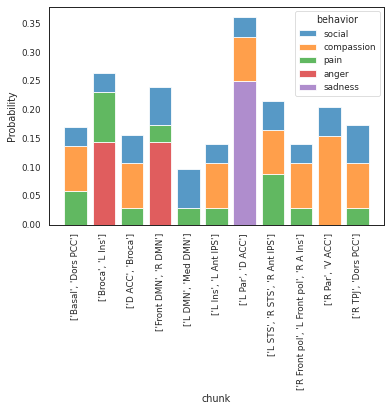

subject:  84


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


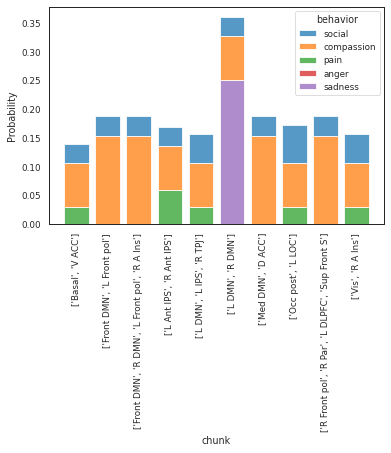

subject:  85


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


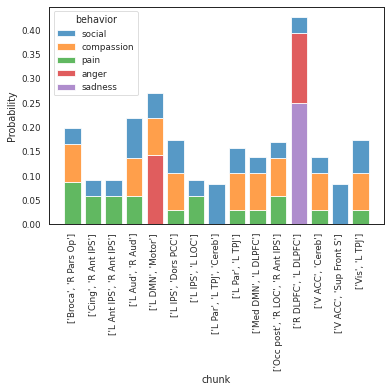

subject:  86


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


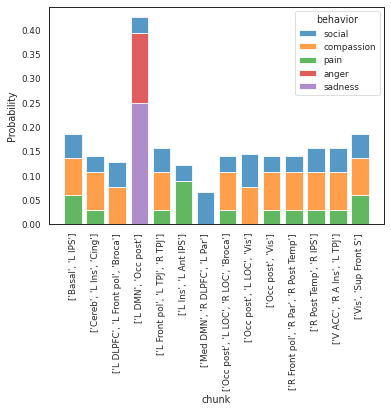

subject:  87


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


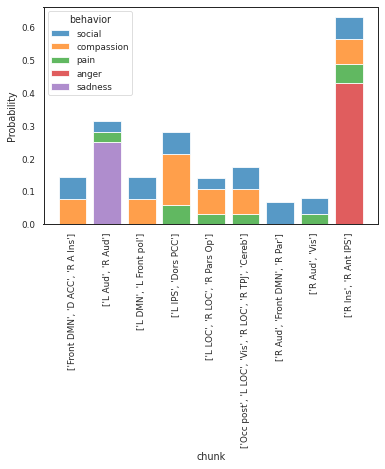

subject:  88


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


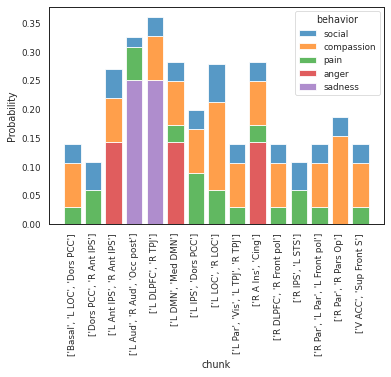

subject:  89


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


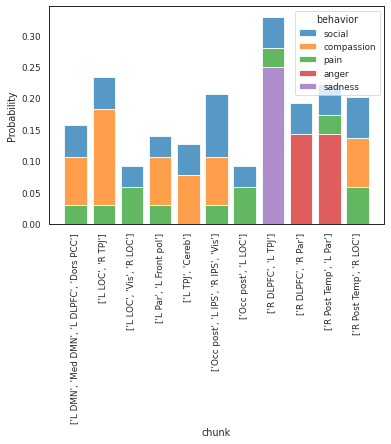

subject:  90


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


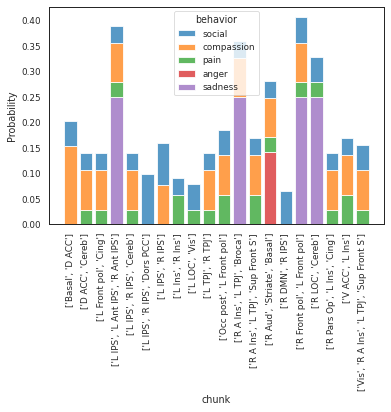

subject:  91


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


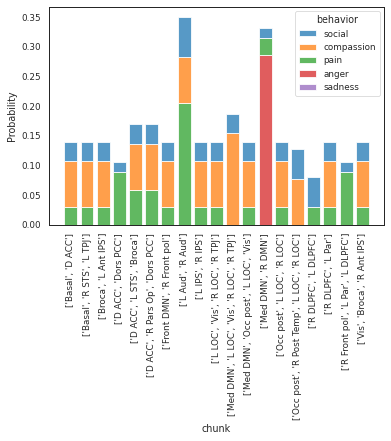

subject:  92


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


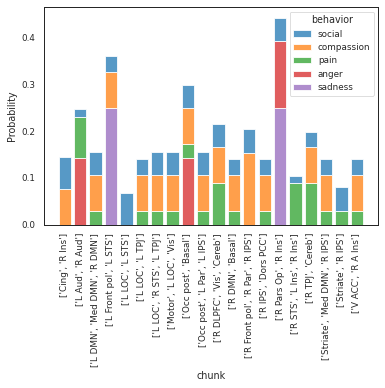

subject:  93


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


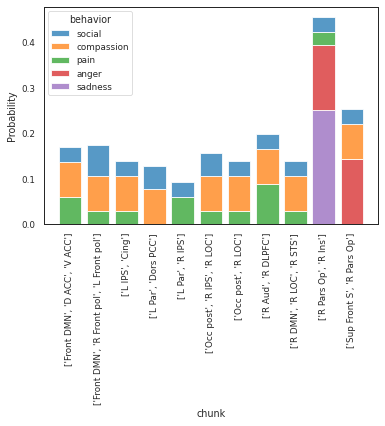

subject:  94


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


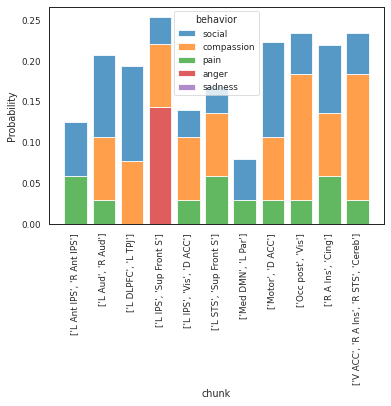

subject:  95


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


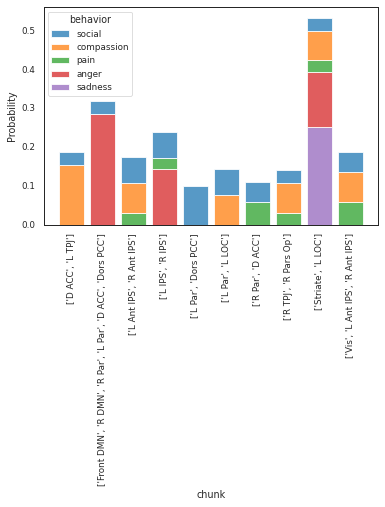

subject:  96


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


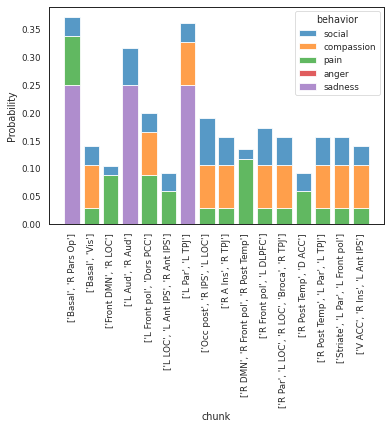

subject:  97


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


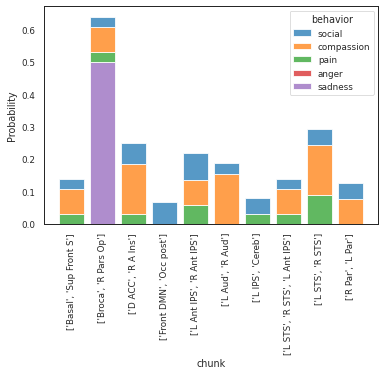

subject:  98


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


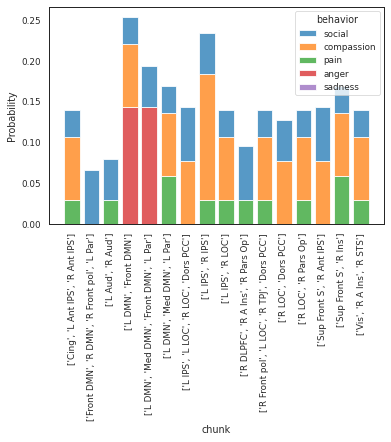

subject:  99


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


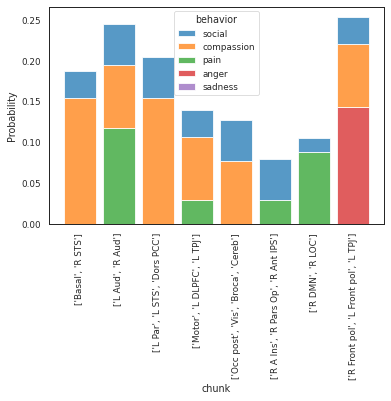

subject:  100


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


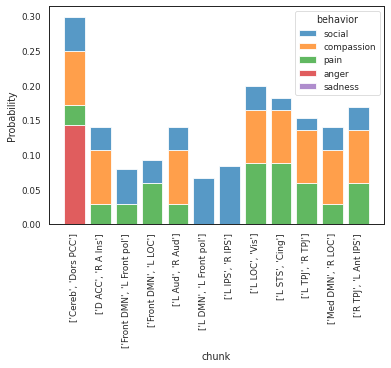

subject:  101


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


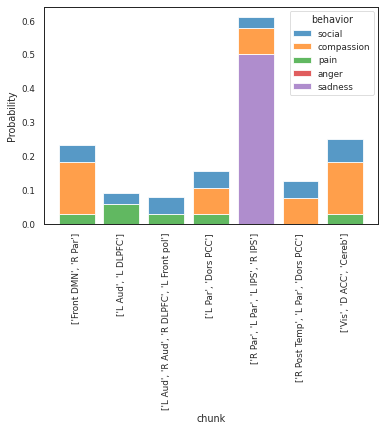

subject:  102


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


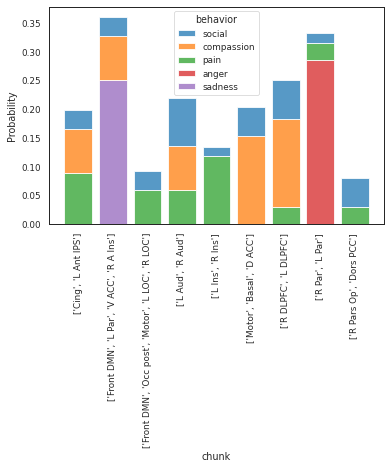

subject:  103


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


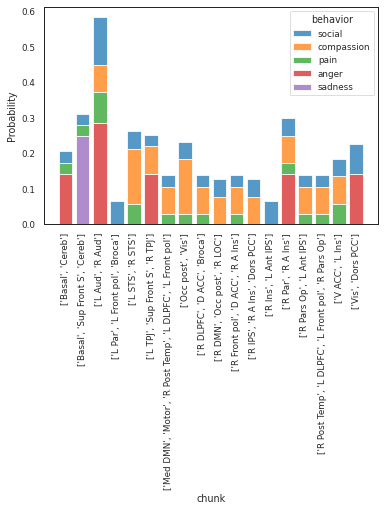

subject:  104


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


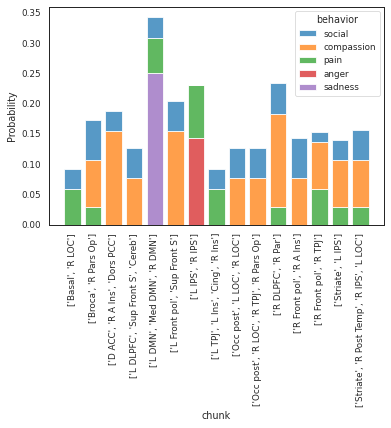

subject:  105


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


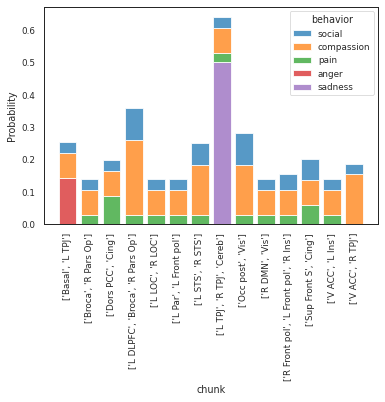

subject:  106


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


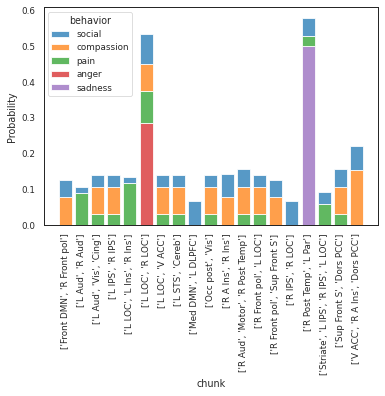

subject:  107


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


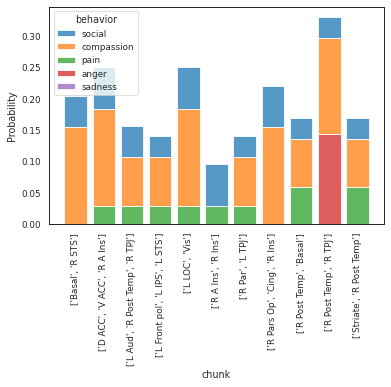

subject:  108


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


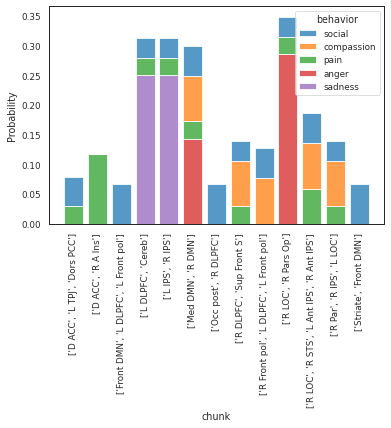

subject:  109


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


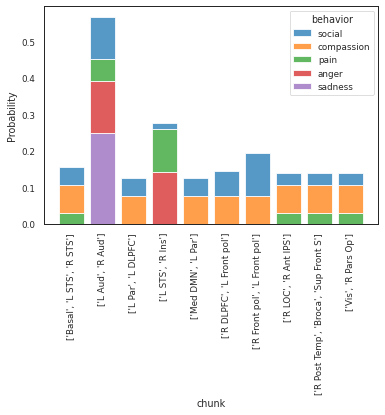

subject:  110


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


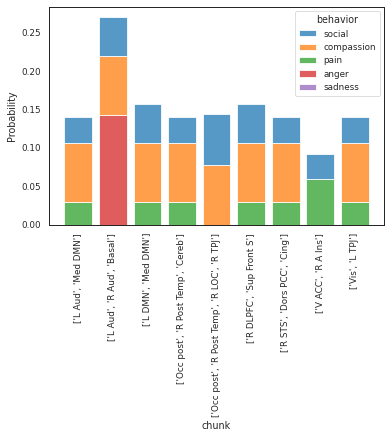

subject:  111


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


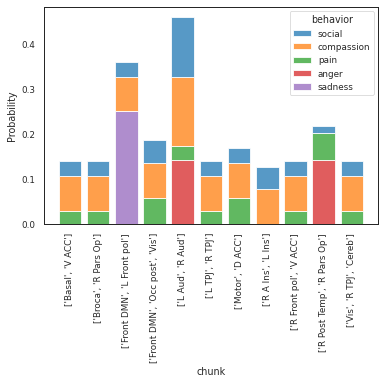

subject:  112


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


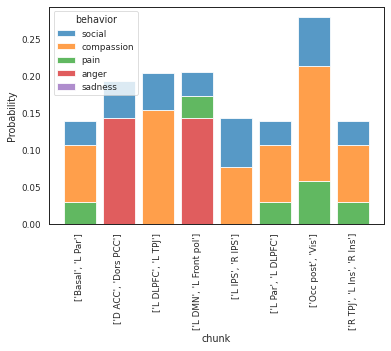

subject:  113


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


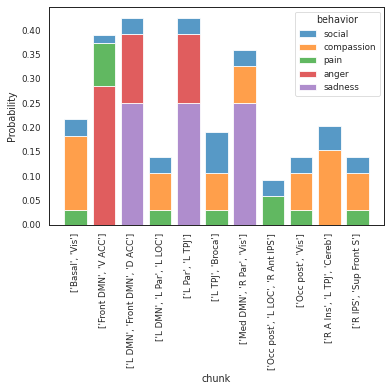

subject:  114


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


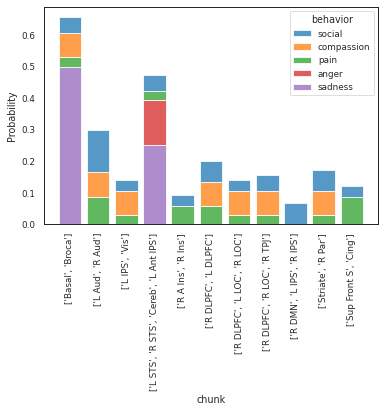

subject:  115


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


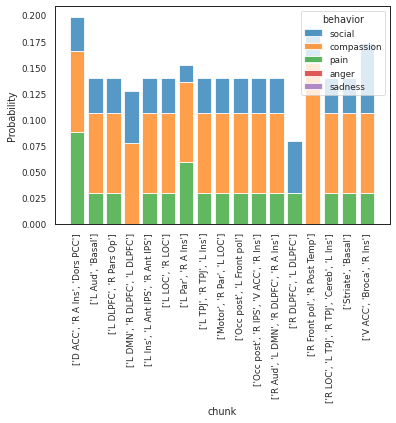

subject:  116


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


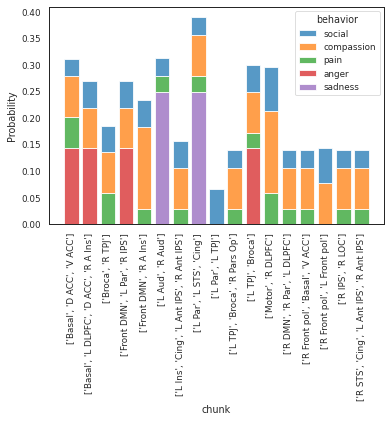

subject:  117


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


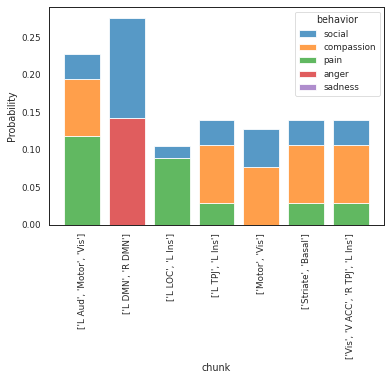

<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


subject:  118


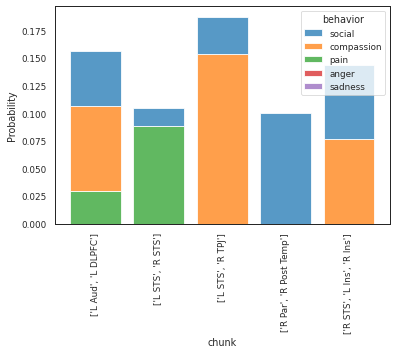

subject:  119


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


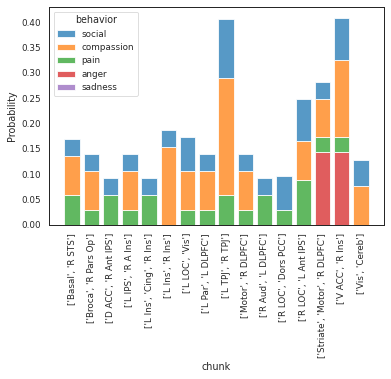

subject:  120


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


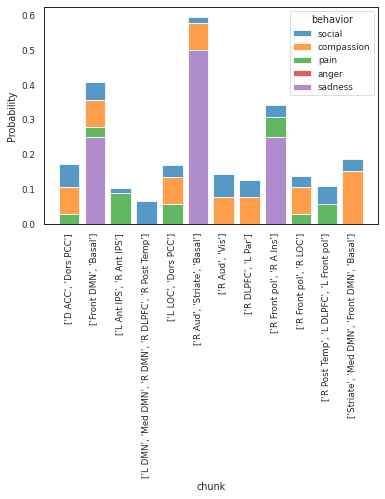

subject:  121


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


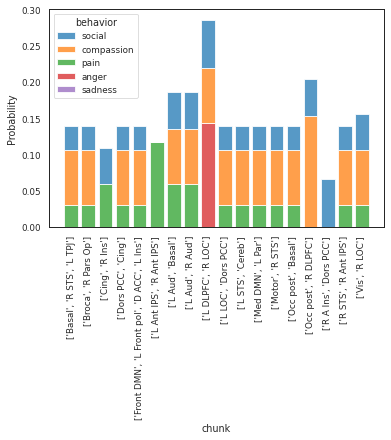

subject:  122


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


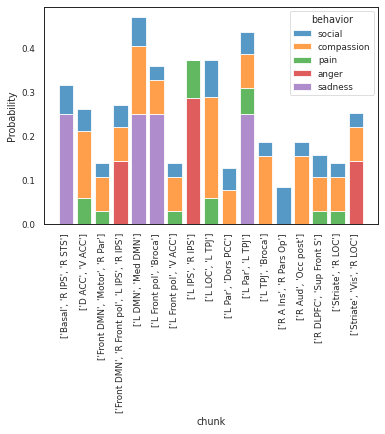

subject:  123


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


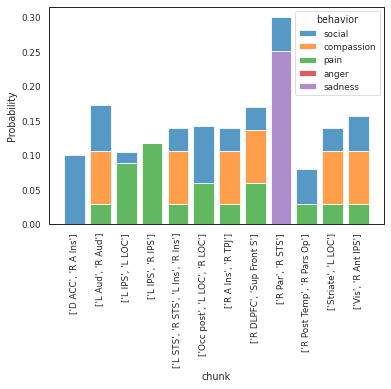

subject:  124


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


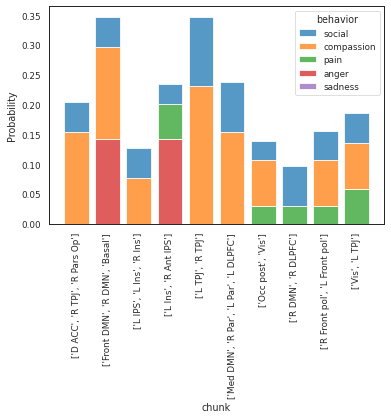

subject:  125


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


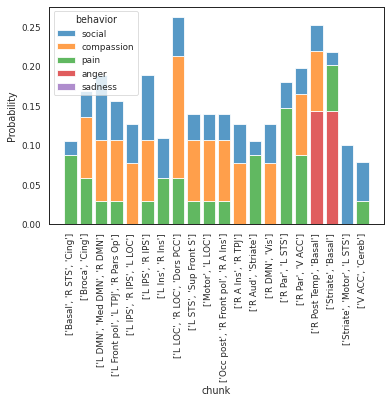

subject:  126


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


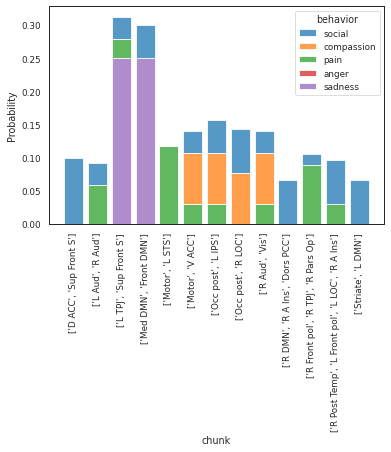

subject:  127


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


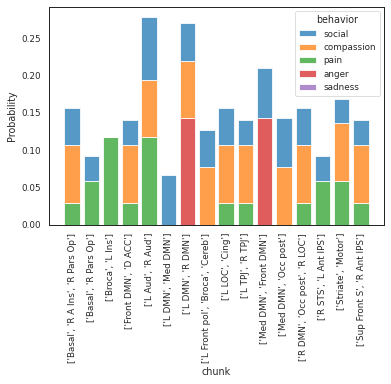

subject:  128


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


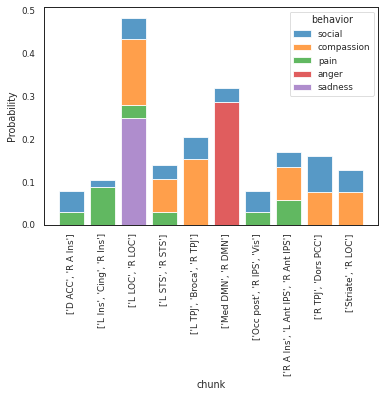

subject:  129


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


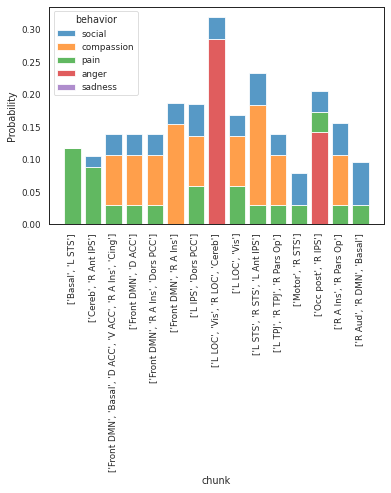

subject:  130


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


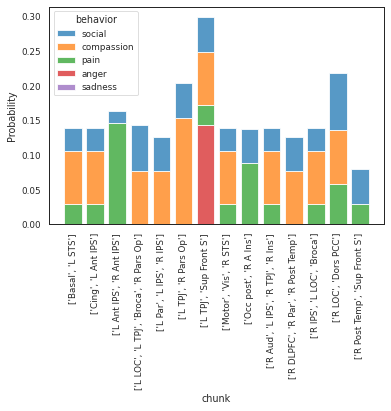

subject:  131


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


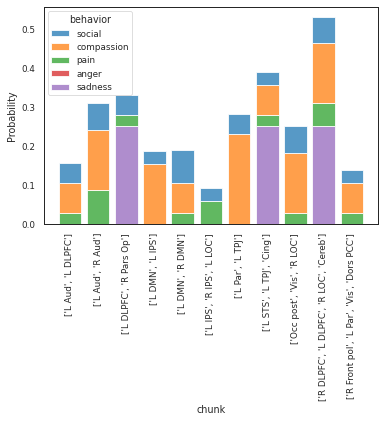

subject:  132


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


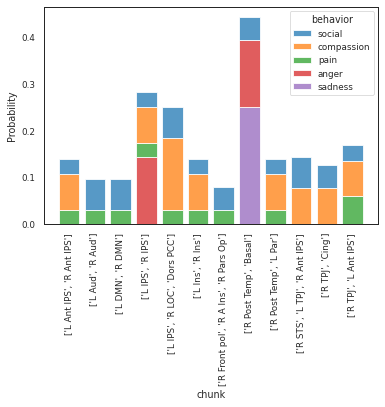

subject:  133


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


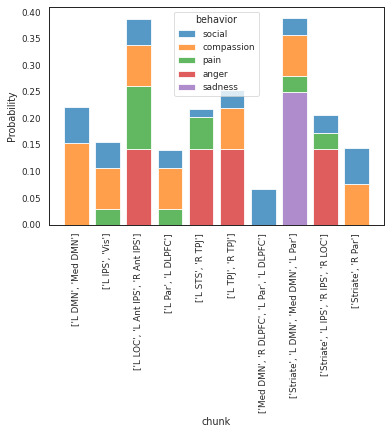

subject:  134


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


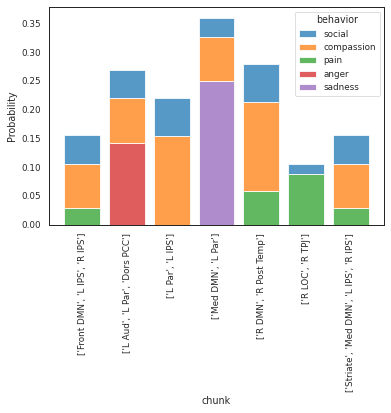

subject:  135


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


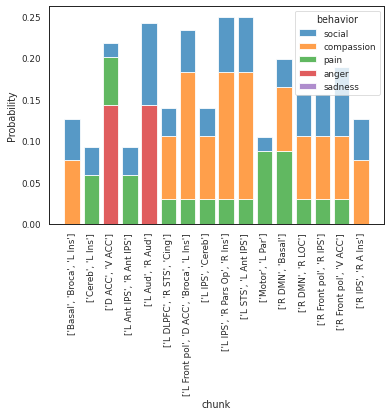

subject:  136


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


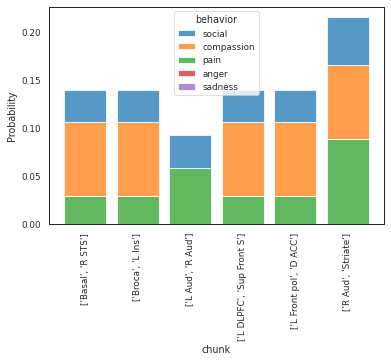

subject:  137


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


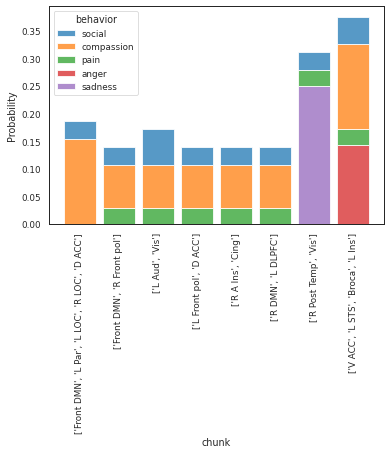

subject:  138


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


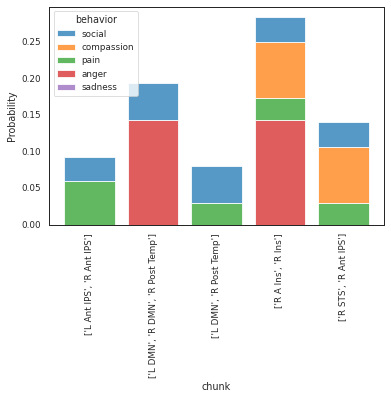

subject:  139


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


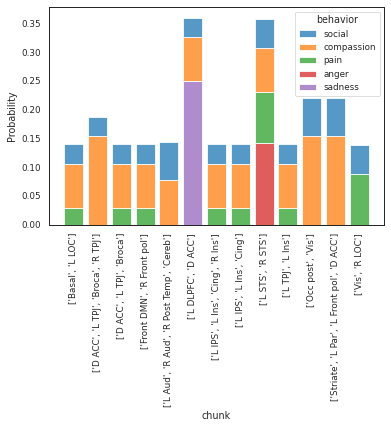

subject:  140


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


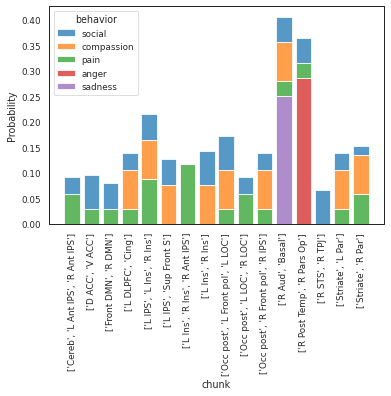

subject:  141


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


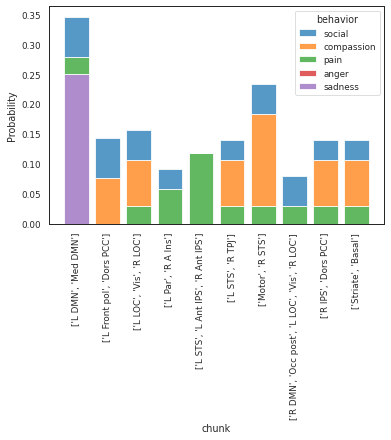

subject:  142


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


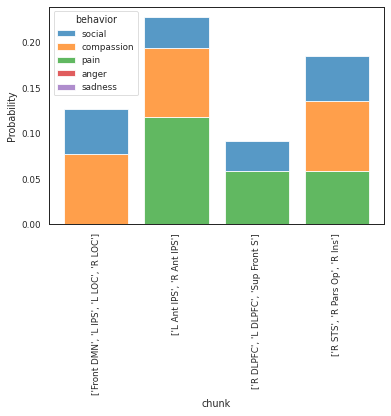

subject:  143


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


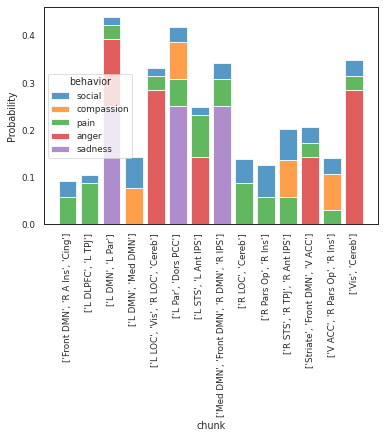

subject:  144


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


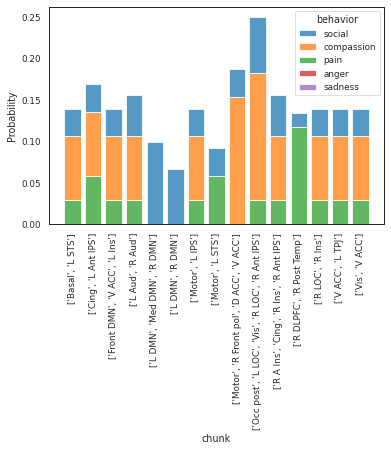

subject:  145


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


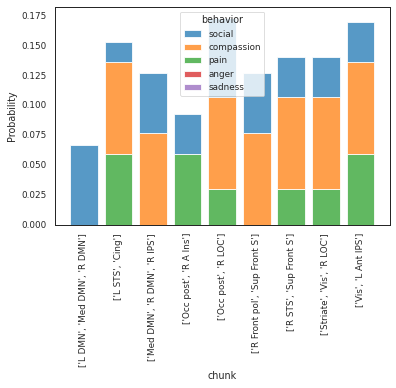

subject:  146


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


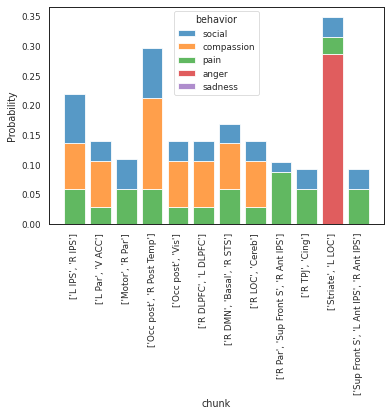

subject:  147


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


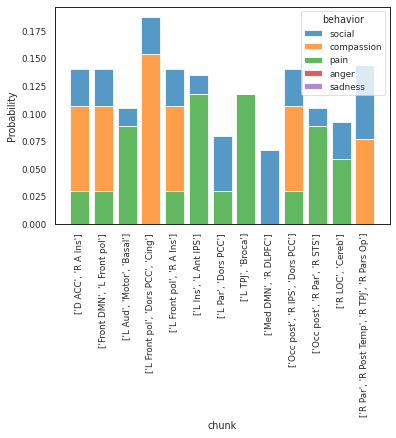

subject:  148


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


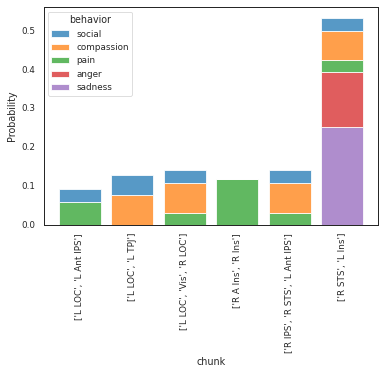

subject:  149


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


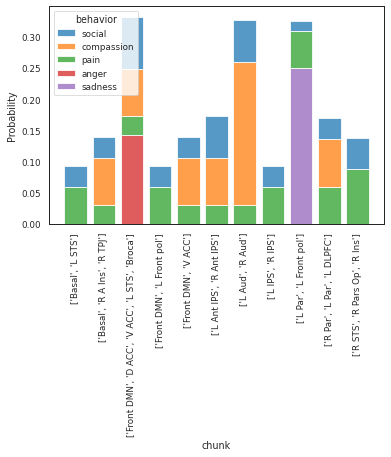

subject:  150


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


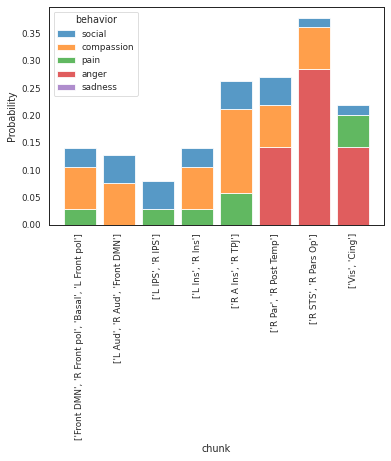

subject:  151


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


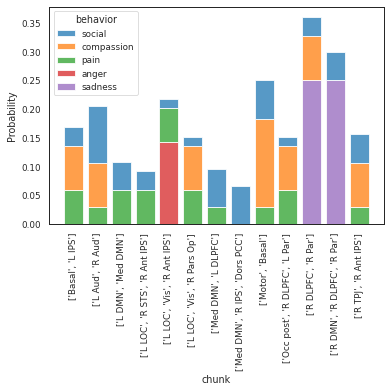

subject:  152


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


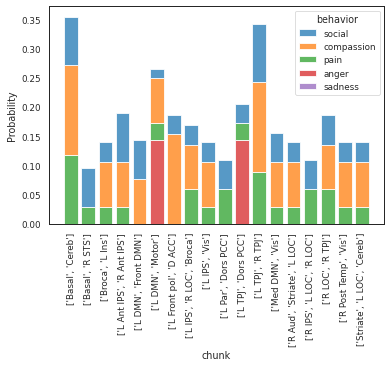

subject:  153


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


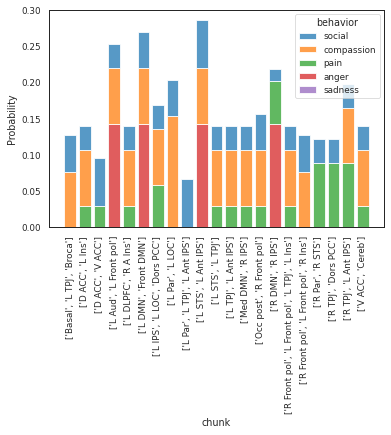

subject:  154


<ipython-input-163-219d9b588346>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)


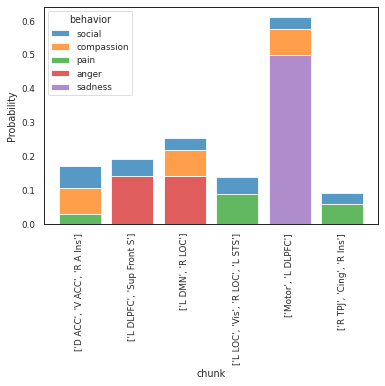

In [163]:
sns.set_style('white')
sns.set_context('paper')

for sub in np.unique(df['subject']):
    print('subject: ', sub)
    dfss = dfn[(dfn['subject'] == sub) & (dfn['behavior'].isin(['social','pain','anger','compassion','sadness'])) & (dfn['chunksize'] >=2)]
    
    ax = sns.histplot(data = dfss ,x='chunk',
        weights='chunkp',
        hue='behavior',
        multiple='stack',
        palette='tab10',
        # Add white borders to the bars.
        edgecolor='white',
        # Shrink the bars a bit so they don't touch.
        shrink=0.8
    )
    ax.set_xticklabels(np.unique(dfss['chunk']),rotation=90,)
    ax.set_ylabel('Probability')
    plt.show()


<ipython-input-165-8ef8db485672>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.unique(dfss['chunk']),rotation=45,ha = 'right',rotation_mode='anchor')


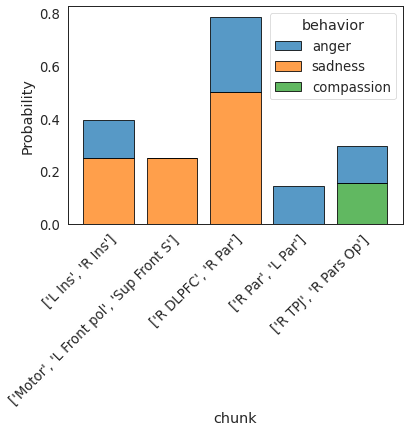

In [165]:
sns.set_context(context='paper', font_scale=1.5, rc=None) 
dfss = dfn[(dfn['subject'] == 32) & (dfn['chunk'].isin(["['L Ins', 'R Ins']","['Motor', 'L Front pol', 'Sup Front S']","['R DLPFC', 'R Par']","['R Par', 'L Par']" ,"['R TPJ', 'R Pars Op']"])) & (dfn['chunkp'] > 0.09) & (dfn['chunksize'] >=2)]

ax = sns.histplot(data = dfss ,x='chunk',
    weights='chunkp',
    hue='behavior',
    multiple='stack',
#     palette='tab10',
    # Add white borders to the bars.
    edgecolor='black',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)
ax.set_xticklabels(np.unique(dfss['chunk']),rotation=45,ha = 'right',rotation_mode='anchor')
ax.set_ylabel('Probability')
plt.show()

In [ ]:
sns.set_context(context='paper', font_scale=1.5, rc=None) 
dfss = dfn[(dfn['subject'] == 32) & (dfn['chunk'].isin(["['L Ins', 'R Ins']","['Motor', 'L Front pol', 'Sup Front S']","['R DLPFC', 'R Par']","['R Par', 'L Par']" ,"['R TPJ', 'R Pars Op']"])) & (dfn['chunkp'] > 0.09) & (dfn['chunksize'] >=2)]

ax = sns.histplot(data = dfss ,x='chunk',
    weights='chunkp',
    hue='behavior',
    multiple='stack',
#     palette='tab10',
    # Add white borders to the bars.
    edgecolor='black',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)
ax.set_xticklabels(np.unique(dfss['chunk']),rotation=45,ha = 'right',rotation_mode='anchor')
ax.set_ylabel('Probability')
plt.show()